In [474]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Abstract**

We are working on a lead data set for an educational company. The main objective of the data is to calculate the lead conversion.

We have carried out operations on Numerical and categorical data.

The dependent variable is converted.


In [475]:
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Importing sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [476]:
data = pd.read_csv("/content/sample_data/leads.csv")

In [477]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [478]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [479]:
data.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [480]:
data.shape

(9240, 37)

In [481]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### **<span style="font-size:36px;"> Q1 - What are the data types? (Only numeric and categorical) </span>**



---


***Numeric Data Types:***
---

<br>Lead Number (int64)</br>
<br>Converted (int64)</br>
<br>TotalVisits (float64)</br>
<br>Total Time Spent on Website (int64)</br>
<br>Page Views Per Visit (float64)</br>
<br>Asymmetrique Activity Score (float64)</br>
<br>Asymmetrique Profile Score (float64)</br>

---

***Categorical Data Types:***

<br>Prospect ID (object)</br>
<br>Lead Origin (object)</br>
<br>Lead Source (object)</br>
<br>Do Not Email (object)</br>
<br>Do Not Call (object)</br>
<br>Last Activity (object)</br>
<br>Country (object)</br>
<br>Specialization (object)</br>
<br>How did you hear about X Education (object)</br>
<br>What is your current occupation (object)</br>
<br>What matters most to you in choosing a course (object)</br>
<br>Search (object)</br>
<br>Magazine (object)</br>
<br>Newspaper Article (object)</br>
<br>X Education Forums (object)</br>
<br>Newspaper (object)</br>
<br>Digital Advertisement (object)</br>
<br>Through Recommendations (object)</br>
<br>Receive More Updates About Our Courses (object)</br>
<br>Tags (object)</br>
<br>Lead Quality (object)</br>
<br>Update me on Supply Chain Content (object)</br>
<br>Get updates on DM Content (object)</br>
<br>Lead Profile (object)</br>
<br>City (object)</br>
<br>Asymmetrique Activity Index (object)</br>
<br>Asymmetrique Profile Index (object)</br>
<br>I agree to pay the amount through cheque (object)</br>
<br>A free copy of Mastering The Interview (object)</br>
<br>Last Notable Activity (object)</br>




In [482]:
round(100 * (data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 



```
# This is formatted as code
```



# Dropping columns with more than 70% null values

# **Q2 Are there missing values?** Below are the operations

In [483]:
missing_percentage = round(100 * (data.isnull().sum() / len(data.index)), 2)

In [484]:
columns_to_drop = missing_percentage[missing_percentage > 70].index


In [485]:
data = data.drop(columns=columns_to_drop)

In [486]:
round(100 * (data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [487]:
data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [488]:
import matplotlib.pyplot as plt
import seaborn as sns

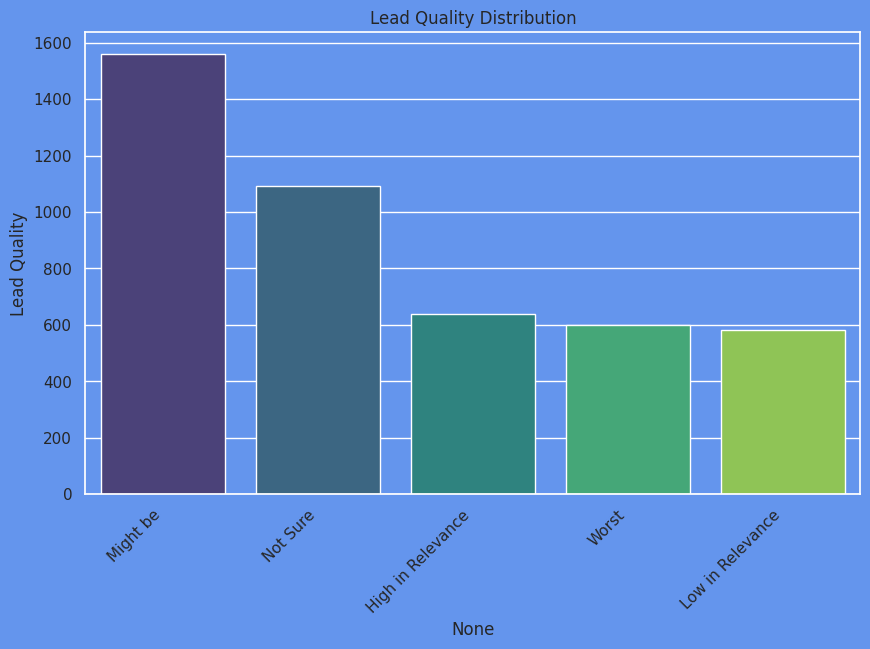

In [489]:
plt.figure(figsize=(10, 6))
sns.set(rc={'axes.facecolor': 'cornflowerblue', 'figure.facecolor': 'cornflowerblue'})
sns.barplot(x=data['Lead Quality'].value_counts().index, y=data['Lead Quality'].value_counts(), palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Lead Quality Distribution')
plt.show()

# **<span style="font-size:36px;">Carrying out operations to making changes to remove null values </span>**

In [490]:
# We have 51% NULL values here so we need to replace the NULL values.
# "Not Sure" seems to be the most neutral value
data['Lead Quality'] = data['Lead Quality'].replace(np.nan,"Not Sure")

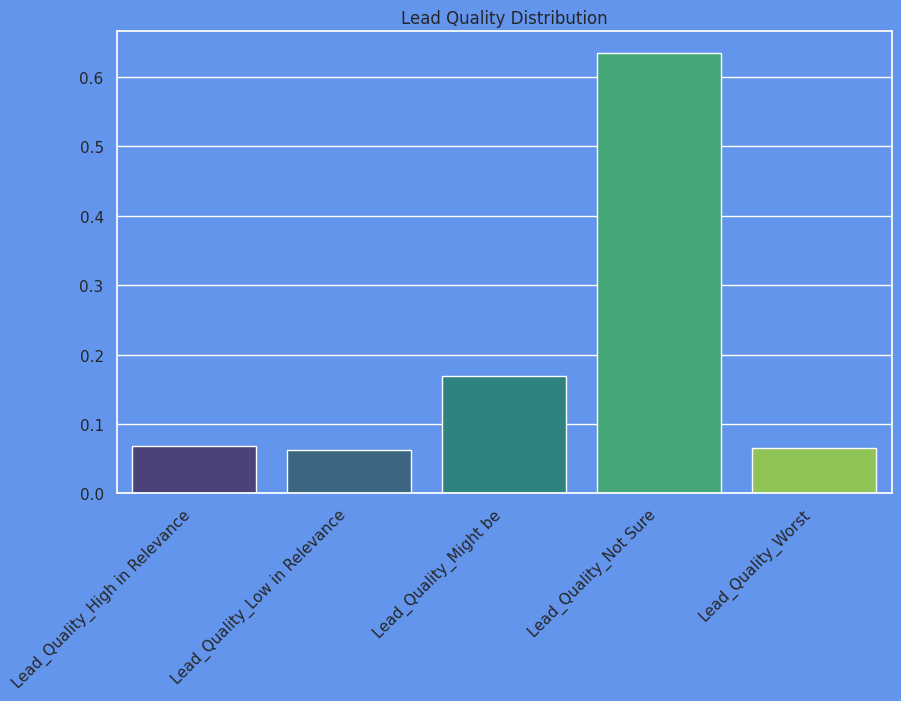

In [491]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'Lead Quality' is the categorical column
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Lead Quality'], prefix='Lead_Quality')

# Extract the columns related to 'Lead Quality' for plotting
lead_quality_columns = [col for col in data_encoded.columns if 'Lead_Quality' in col]

# Plot the count of categories in 'Lead Quality'
plt.figure(figsize=(10, 6))
sns.set(rc={'axes.facecolor': 'cornflowerblue', 'figure.facecolor': 'cornflowerblue'})
sns.barplot(data=data_encoded[lead_quality_columns], palette='viridis', ci=None)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Lead Quality Distribution')
plt.show()


In [492]:
data['Lead Quality'] = data['Lead Quality'].replace(np.nan,"Not Sure")

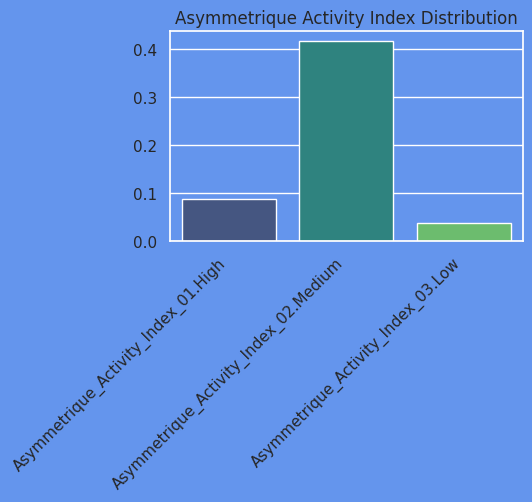

In [493]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Asymmetrique Activity Index'], prefix='Asymmetrique_Activity_Index')

# Extract the columns related to 'Asymmetrique Activity Index' for plotting
activity_index_columns = [col for col in data_encoded.columns if 'Asymmetrique_Activity_Index' in col]

# Plot the count of categories in 'Asymmetrique Activity Index'
plt.figure(figsize=(10, 6))
sns.set(rc={'axes.facecolor': 'cornflowerblue', 'figure.facecolor': 'cornflowerblue'})
plt.subplot(2, 2, 1)
sns.barplot(data=data_encoded[activity_index_columns], palette='viridis', ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Asymmetrique Activity Index Distribution')


plt.show()

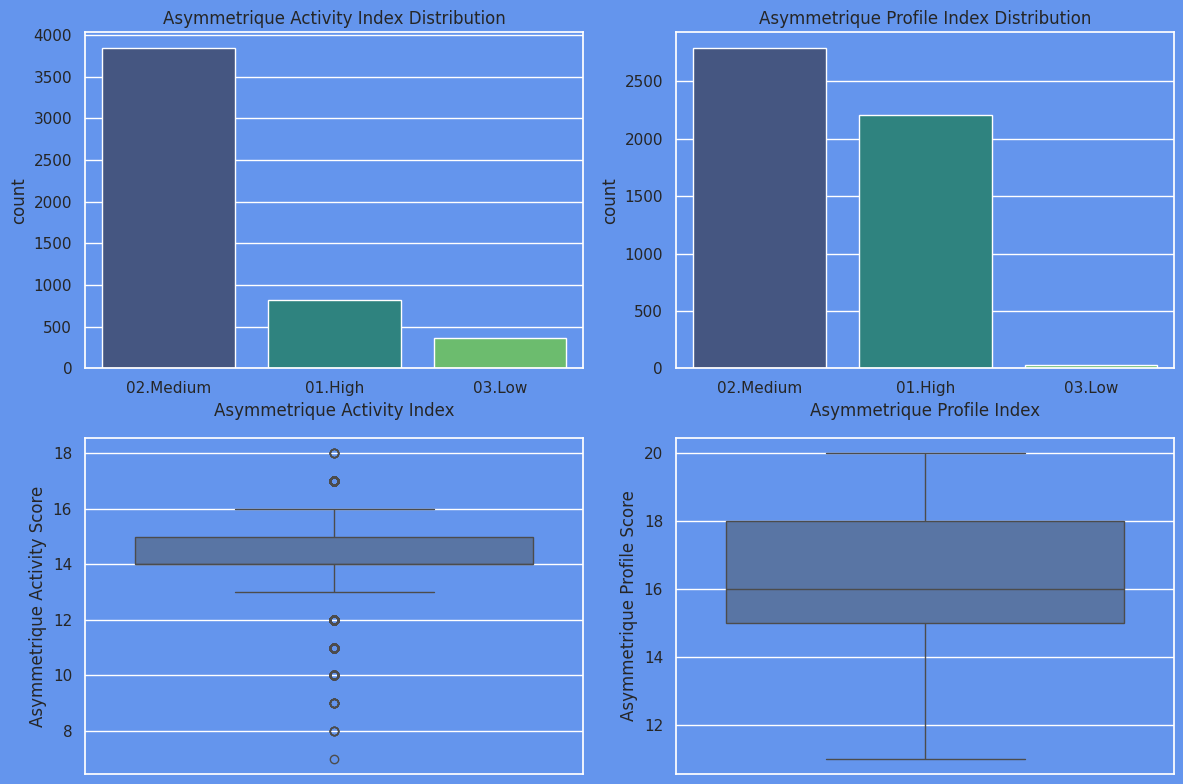

In [494]:
plt.figure(figsize=(12, 8))

# Plot for 'Asymmetrique Activity Index'
plt.subplot(2, 2, 1)
sns.countplot(x='Asymmetrique Activity Index', data=data, palette='viridis')
plt.title('Asymmetrique Activity Index Distribution')

# Plot for 'Asymmetrique Profile Index'
plt.subplot(2, 2, 2)
sns.countplot(x='Asymmetrique Profile Index', data=data, palette='viridis')
plt.title('Asymmetrique Profile Index Distribution')

plt.subplot(2,2,3)
sns.boxplot(data['Asymmetrique Activity Score'])

plt.subplot(2,2,4)
sns.boxplot(data['Asymmetrique Profile Score'])

plt.tight_layout()
plt.show()

# Plotting Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score

In [495]:
data['Asymmetrique Activity Index'].value_counts()


02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

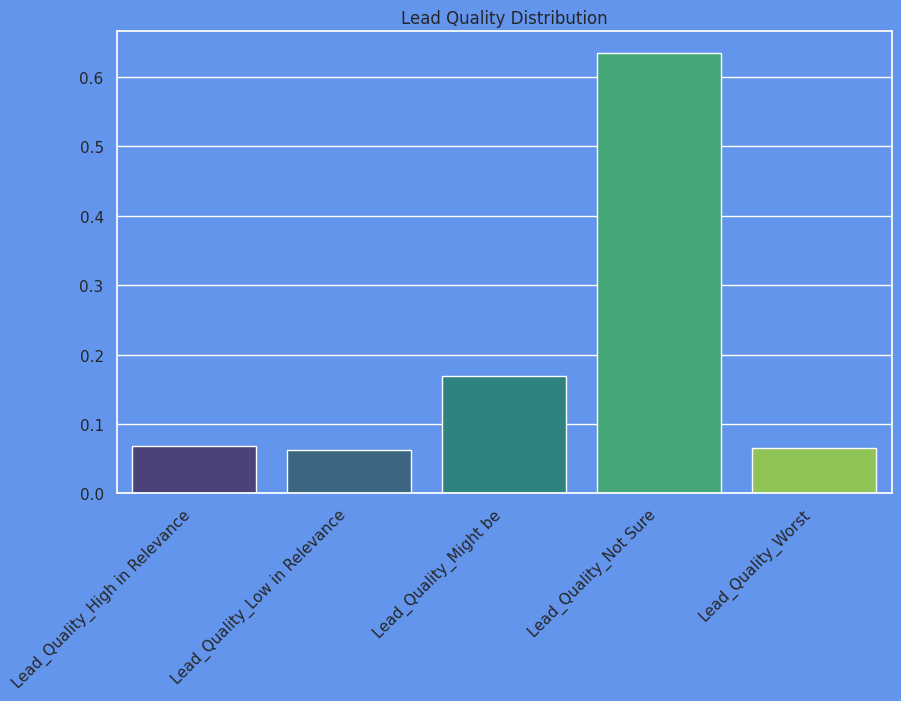

In [496]:
data_encoded = pd.get_dummies(data, columns=['Lead Quality'], prefix='Lead_Quality')

# Extract the columns related to 'Lead Quality' for plotting
lead_quality_columns = [col for col in data_encoded.columns if 'Lead_Quality' in col]

# Plot the count of categories in 'Lead Quality'
plt.figure(figsize=(10, 6))
sns.set(rc={'axes.facecolor': 'cornflowerblue', 'figure.facecolor': 'cornflowerblue'})
sns.barplot(data=data_encoded[lead_quality_columns], palette='viridis', ci=None)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Lead Quality Distribution')
plt.show()

In [497]:
data['Asymmetrique Profile Index'].value_counts()


02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [498]:
data['Asymmetrique Activity Score'].value_counts()


14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [499]:
data['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [500]:
data = data.drop(['Asymmetrique Activity Index'], axis=1, errors='ignore')


In [501]:
data = data.drop(['Asymmetrique Profile Index'], axis=1, errors='ignore')


In [502]:
data = data.drop(['Asymmetrique Activity Score'], axis=1, errors='ignore')


In [503]:
data = data.drop(['Asymmetrique Profile Score'], axis=1, errors='ignore')


In [504]:
data["City"].describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

In [505]:
data.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [506]:
data["City"].describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

In [507]:
data["City"] = data["City"].replace(np.NaN,"Mumbai")

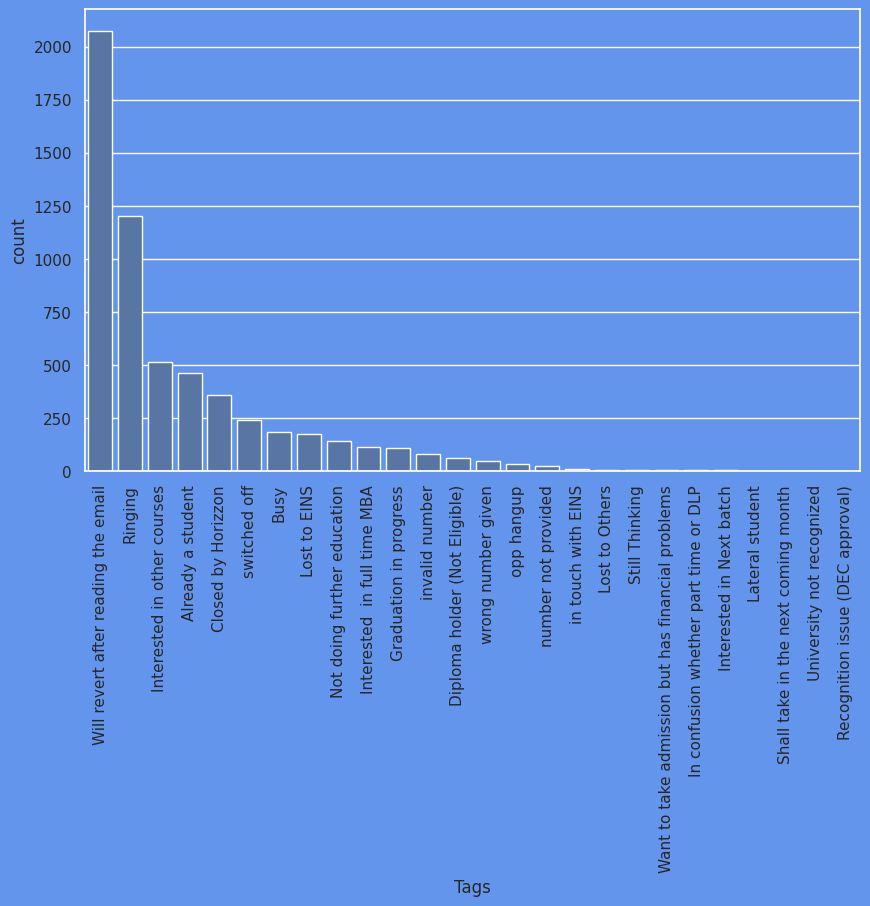

In [508]:
tags_counts = data["Tags"].value_counts()

# Create a countplot for the "Tags" column using the counts
plt.figure(figsize=(10, 6))
sns.set(rc={'axes.facecolor': 'cornflowerblue', 'figure.facecolor': 'cornflowerblue'})
sns.countplot(data=data, x="Tags", order=tags_counts.index)
plt.xticks(rotation=90)
plt.show()


In [509]:
data["Tags"] = data["Tags"].replace(np.NaN, "Will revert after reading the email")

In [510]:
data["Tags"].describe()

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

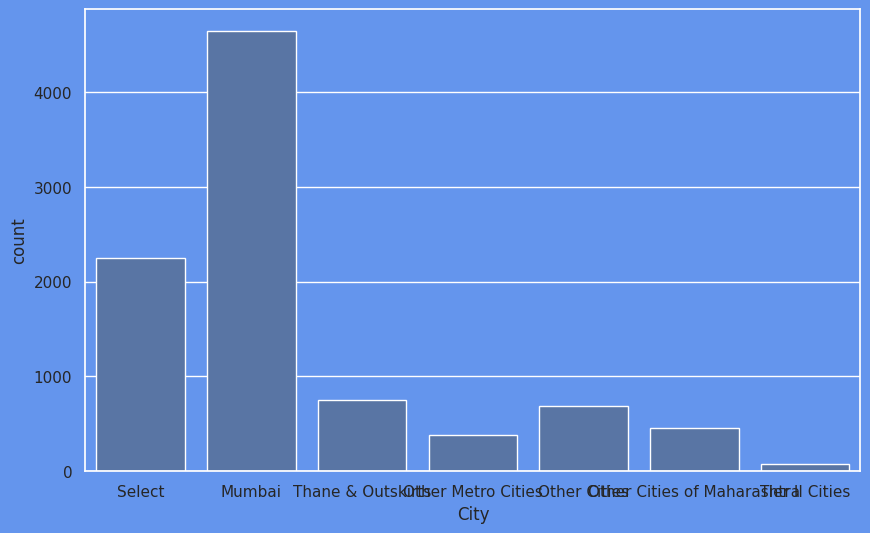

In [511]:
plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

# Assuming "City" is a column in your DataFrame
sns.countplot(x="City", data=data)
plt.show()


In [512]:
data["City"] = data["City"].replace(np.NaN,"Mumbai")

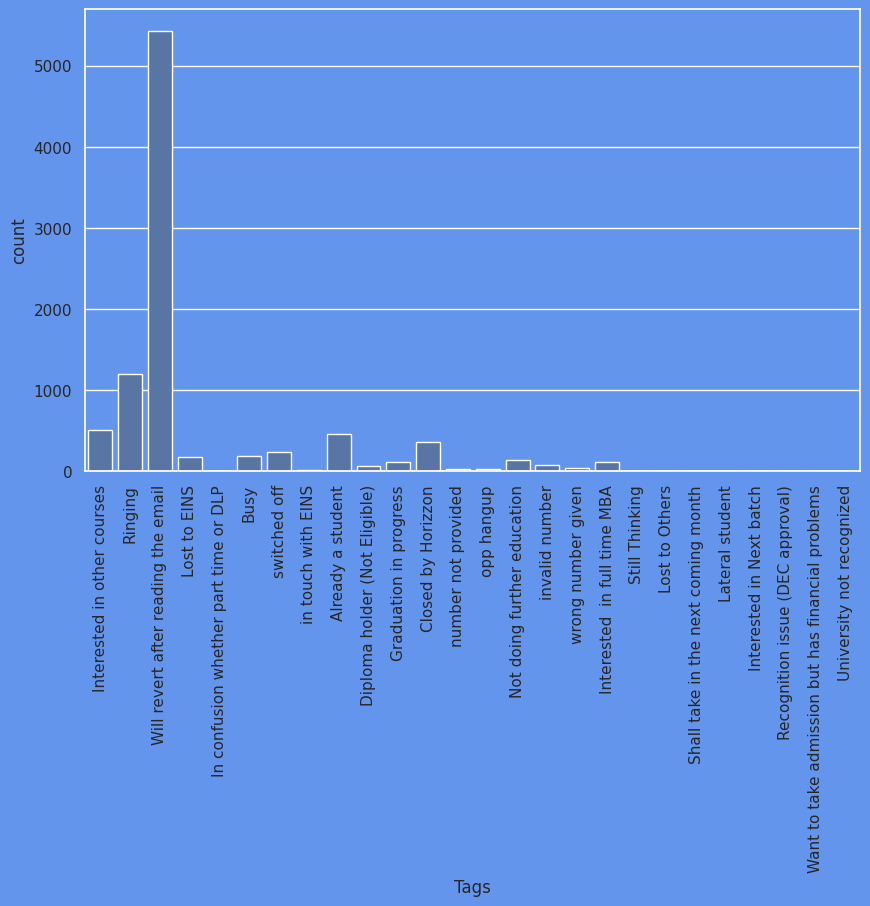

In [513]:
tags_counts = data["Tags"].value_counts()

plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

# Assuming "Tags" is a column in your DataFrame
sns.countplot(x="Tags", data=data)
plt.xticks(rotation=90)
plt.show()

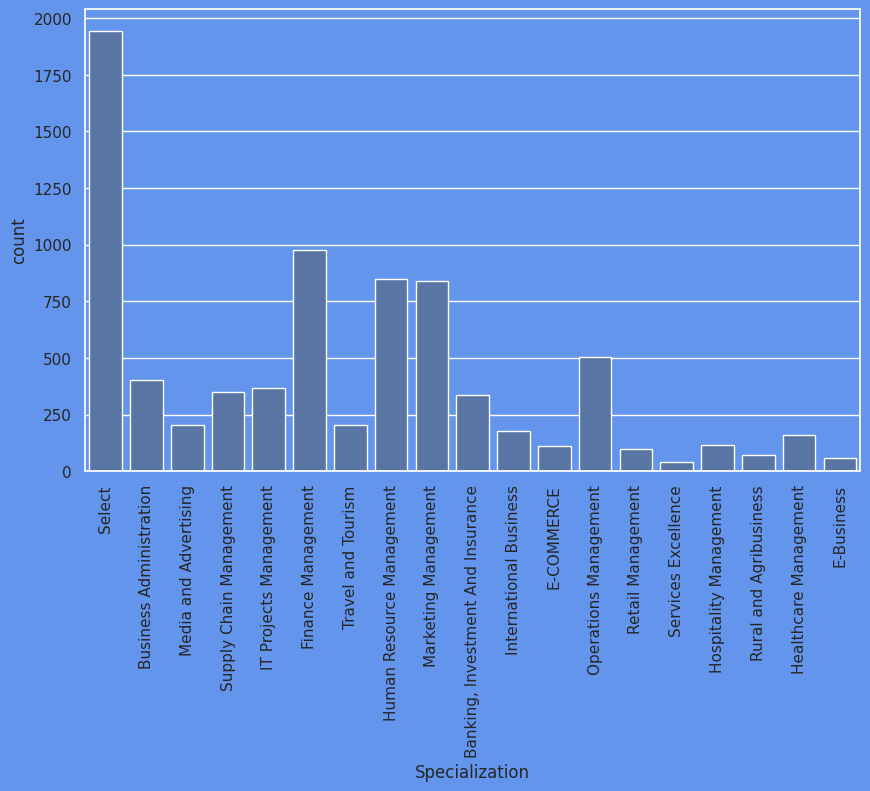

In [514]:
specialization_counts = data["Specialization"].value_counts()

plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

sns.countplot(x="Specialization", data=data)
plt.xticks(rotation=90)
plt.show()

In [515]:
data["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [516]:
data["Specialization"].describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

In [517]:
data["Specialization"] = data["Specialization"].replace(np.NaN,"Others")

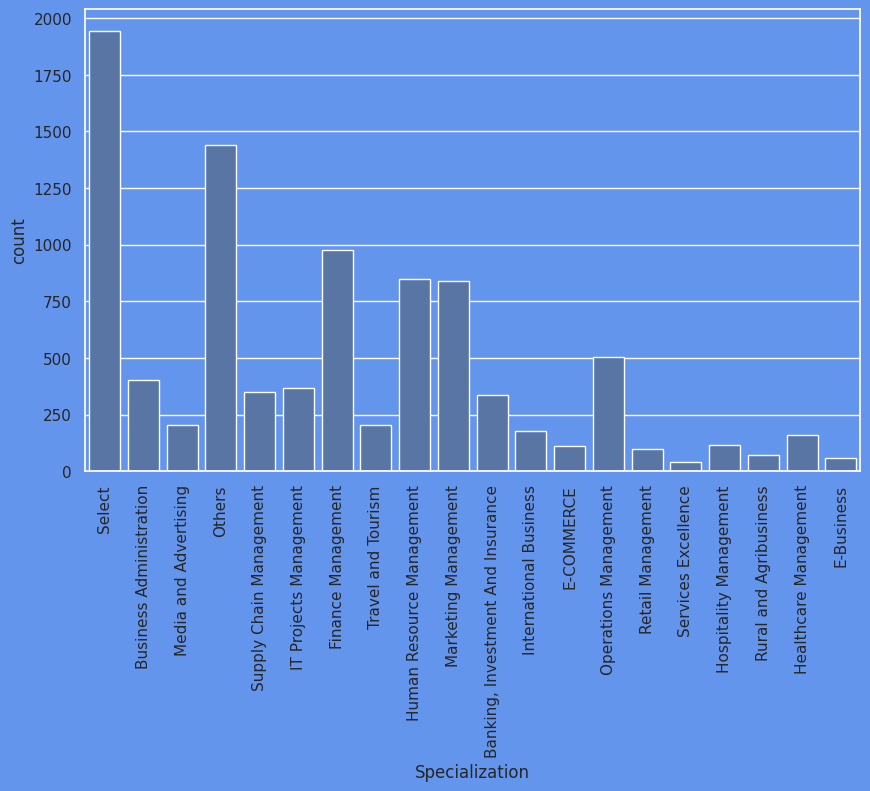

In [518]:
specialization_counts = data["Specialization"].value_counts()

plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

sns.countplot(x="Specialization", data=data)
plt.xticks(rotation=90)
plt.show()

In [519]:
data["What matters most to you in choosing a course"].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [520]:
data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [521]:
data["What matters most to you in choosing a course"] = data["What matters most to you in choosing a course"].replace(np.NaN,"Better Career Prospects")

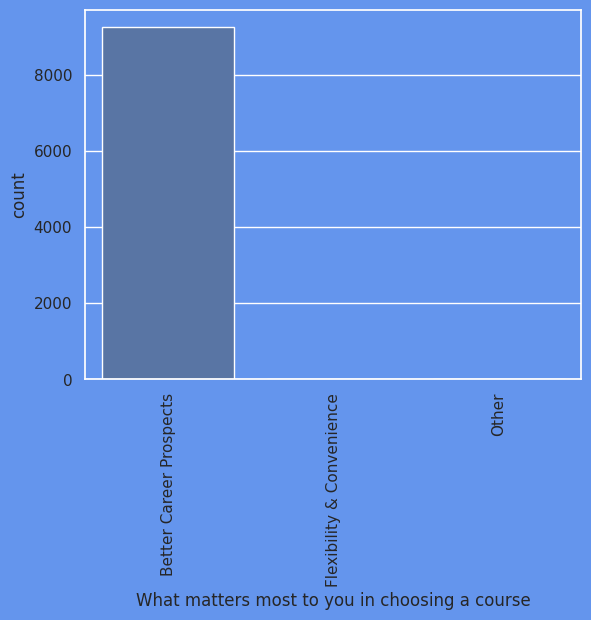

In [522]:
sns.countplot(x="What matters most to you in choosing a course", data=data)
plt.xticks(rotation=90)
plt.show()

In [523]:
data["What is your current occupation"].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [524]:
data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [525]:
data["What is your current occupation"] = data["What is your current occupation"].replace(np.NaN,"Unemployed")

In [526]:
data["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [527]:
data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [528]:
data["Country"] = data["Country"].replace(np.NaN,"India")

In [529]:
data["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [530]:
data["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [531]:
data["TotalVisits"] = data["TotalVisits"].replace(np.NaN,data["TotalVisits"].mean())

In [532]:
data["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [533]:
data["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [534]:
data["Page Views Per Visit"] = data["Page Views Per Visit"].replace(np.NaN,data["Page Views Per Visit"].mean())

In [535]:
data["Last Activity"].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [536]:
data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [537]:
data["Last Activity"] = data["Last Activity"].replace(np.NaN,"Email Opened")

In [538]:
data["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [539]:
data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [540]:
data["Lead Source"] = data["Lead Source"].replace(np.NaN,"Google")

In [541]:
data["Country"] = data["Country"].replace(np.NaN,"India")

In [542]:
data["Tags"] = data["Tags"].replace(np.NaN,"Will revert after reading the email")

In [543]:
round(100 * (data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [544]:
data = data.drop(['How did you hear about X Education'], axis=1, errors='ignore')


In [545]:
data = data.drop(['Lead Profile'], axis=1, errors='ignore')


In [546]:
round(100 * (data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [547]:
pd.set_option('display.max_columns', None)
data

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website         India   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization What is your current occupation  \
0                        Select                      Unemployed   
1                        Select                      Unemployed   
2       Business Administration                         Student   
3         Media and Advertising                      Unemployed   
4                        Select                      Unemployed   
...                         ...                             ...   
9235     IT Projects Management                      Unemployed   
9236      Media and Advertising                      Unemployed   
9237    Business Administration                      Unemployed   
9238  Human Resource Management                      Unemployed   
9239    Supply Chain Management                      Unemployed   

     What matters most to you in choosing a course Search Magazine

#**Q3 What are the distributions of the Numeric variables?**

The QQ-plot,SNS plot and Co-relation matrix show normal distribution with some outliers

<Figure size 800x500 with 0 Axes>

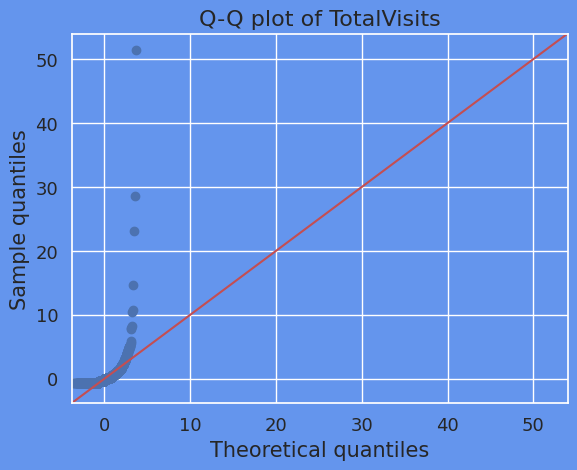

<Figure size 800x500 with 0 Axes>

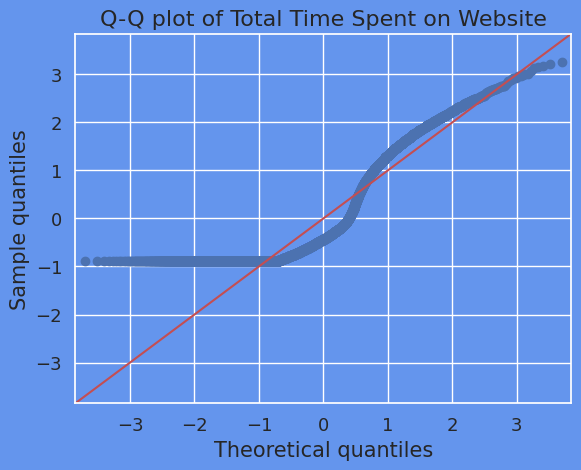

<Figure size 800x500 with 0 Axes>

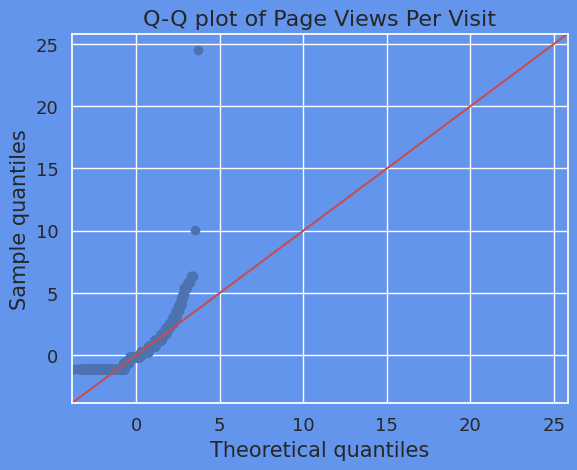

In [548]:
from statsmodels.graphics.gofplots import qqplot

data_norm = data[
    ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

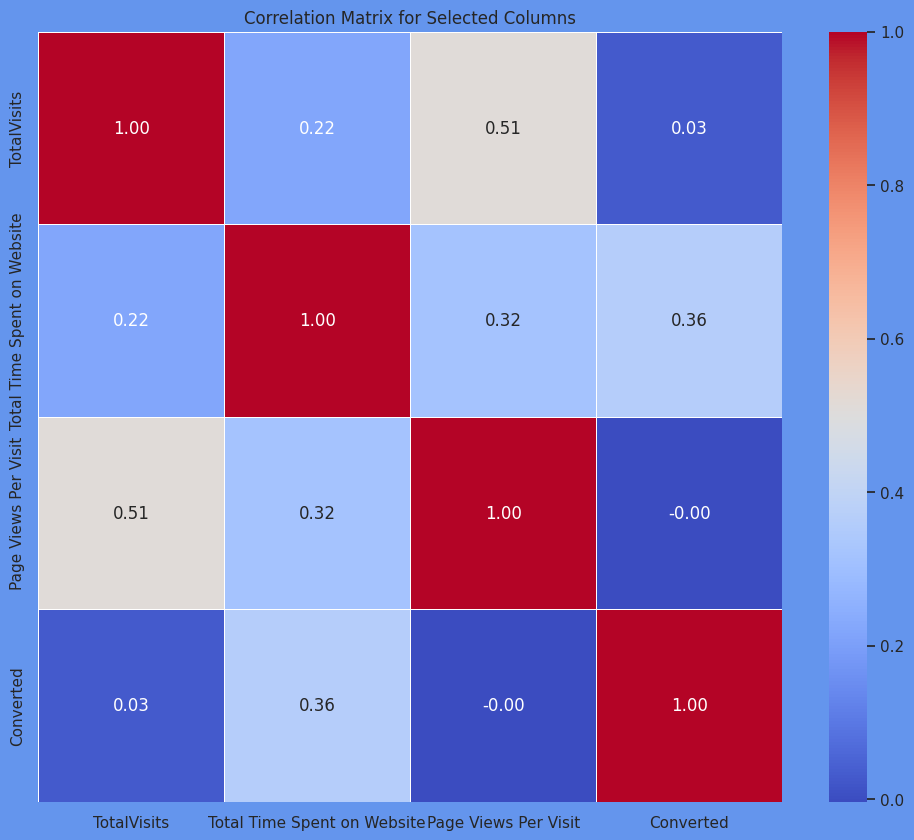

In [549]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
selected_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']  # Replace with the actual column names you want to include

# Select only the specified columns from the DataFrame
selected_data = data[selected_columns]

# Create a correlation matrix for the selected columns
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Selected Columns")
plt.show()


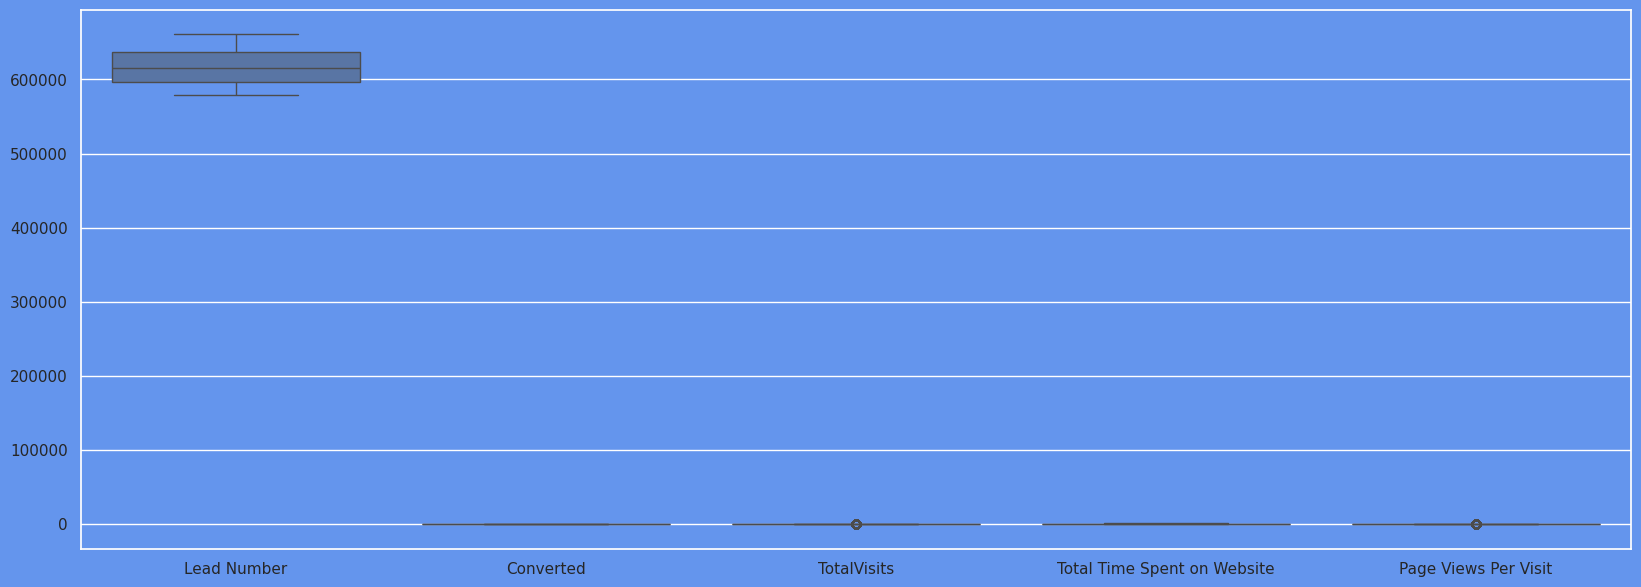

In [550]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data.select_dtypes(include='number'))
plt.show()

Normalizing Lead Number

In [551]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'Lead Number' is a column in your DataFrame called 'data'
# Replace 'data' and 'Lead Number' with your actual DataFrame and column names

# Extract the column for normalization
lead_number_column = data['Lead Number']

# Reshape the data as MinMaxScaler expects a 2D array
lead_number_column_reshaped = lead_number_column.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
lead_number_normalized = scaler.fit_transform(lead_number_column_reshaped)

# Replace the original column with the normalized values
data['Lead Number'] = lead_number_normalized.flatten()


# Q9 Do the ranges of the predictor variables make sense?

The range of predictor variable differ vastly from each other and hence I have normalized it in the operation ahead for TotalVisits,Total Time Spent on Website,Page Views Per Visit for better boxplot quality

In [552]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Display summary statistics
summary_statistics = numeric_columns.describe()

print(summary_statistics)


       Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000  9240.000000                  9240.000000   
mean      0.463714     0.385390     3.445238                   487.698268   
std       0.288237     0.486714     4.818723                   548.021466   
min       0.000000     0.000000     0.000000                     0.000000   
25%       0.208752     0.000000     1.000000                    12.000000   
50%       0.442663     0.000000     3.000000                   248.000000   
75%       0.712456     1.000000     5.000000                   936.000000   
max       1.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.362820  
std                2.145333  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000  


Normalizing Total Time Spent on Website

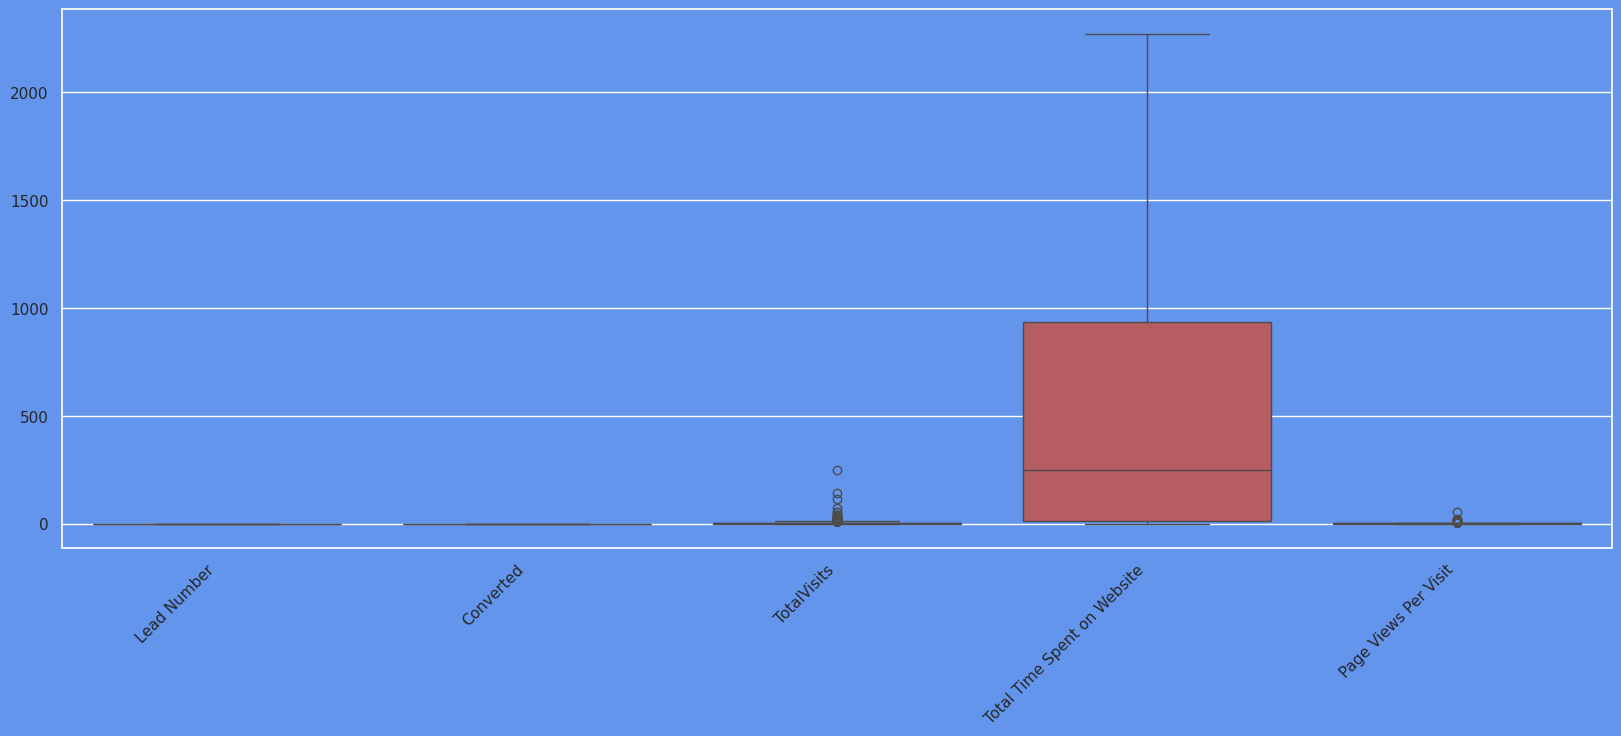

In [553]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.show()

In [554]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'Lead Number' is a column in your DataFrame called 'data'
# Replace 'data' and 'Lead Number' with your actual DataFrame and column names

# Extract the column for normalization
lead_number_column = data['Total Time Spent on Website']

# Reshape the data as MinMaxScaler expects a 2D array
lead_number_column_reshaped = lead_number_column.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
lead_number_normalized = scaler.fit_transform(lead_number_column_reshaped)

# Replace the original column with the normalized values
data['Total Time Spent on Website'] = lead_number_normalized.flatten()

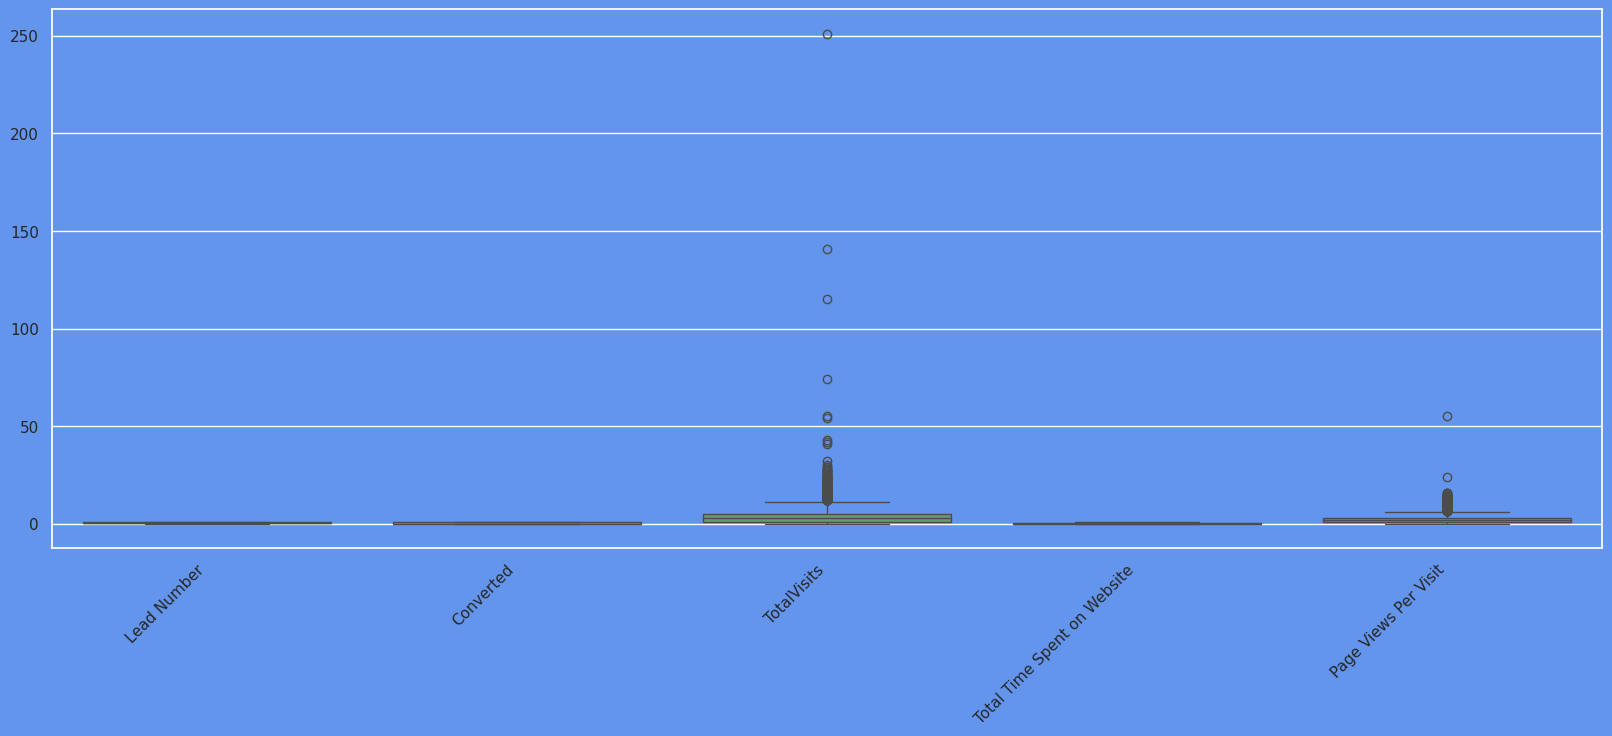

In [555]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.show()

In [556]:
# data = data.drop(['Prospect ID'], axis=1, errors='ignore')

In [557]:
# data = data.drop(['Lead Number'], axis=1, errors='ignore')

Number of columns before selection: 31
Number of numeric columns: 5


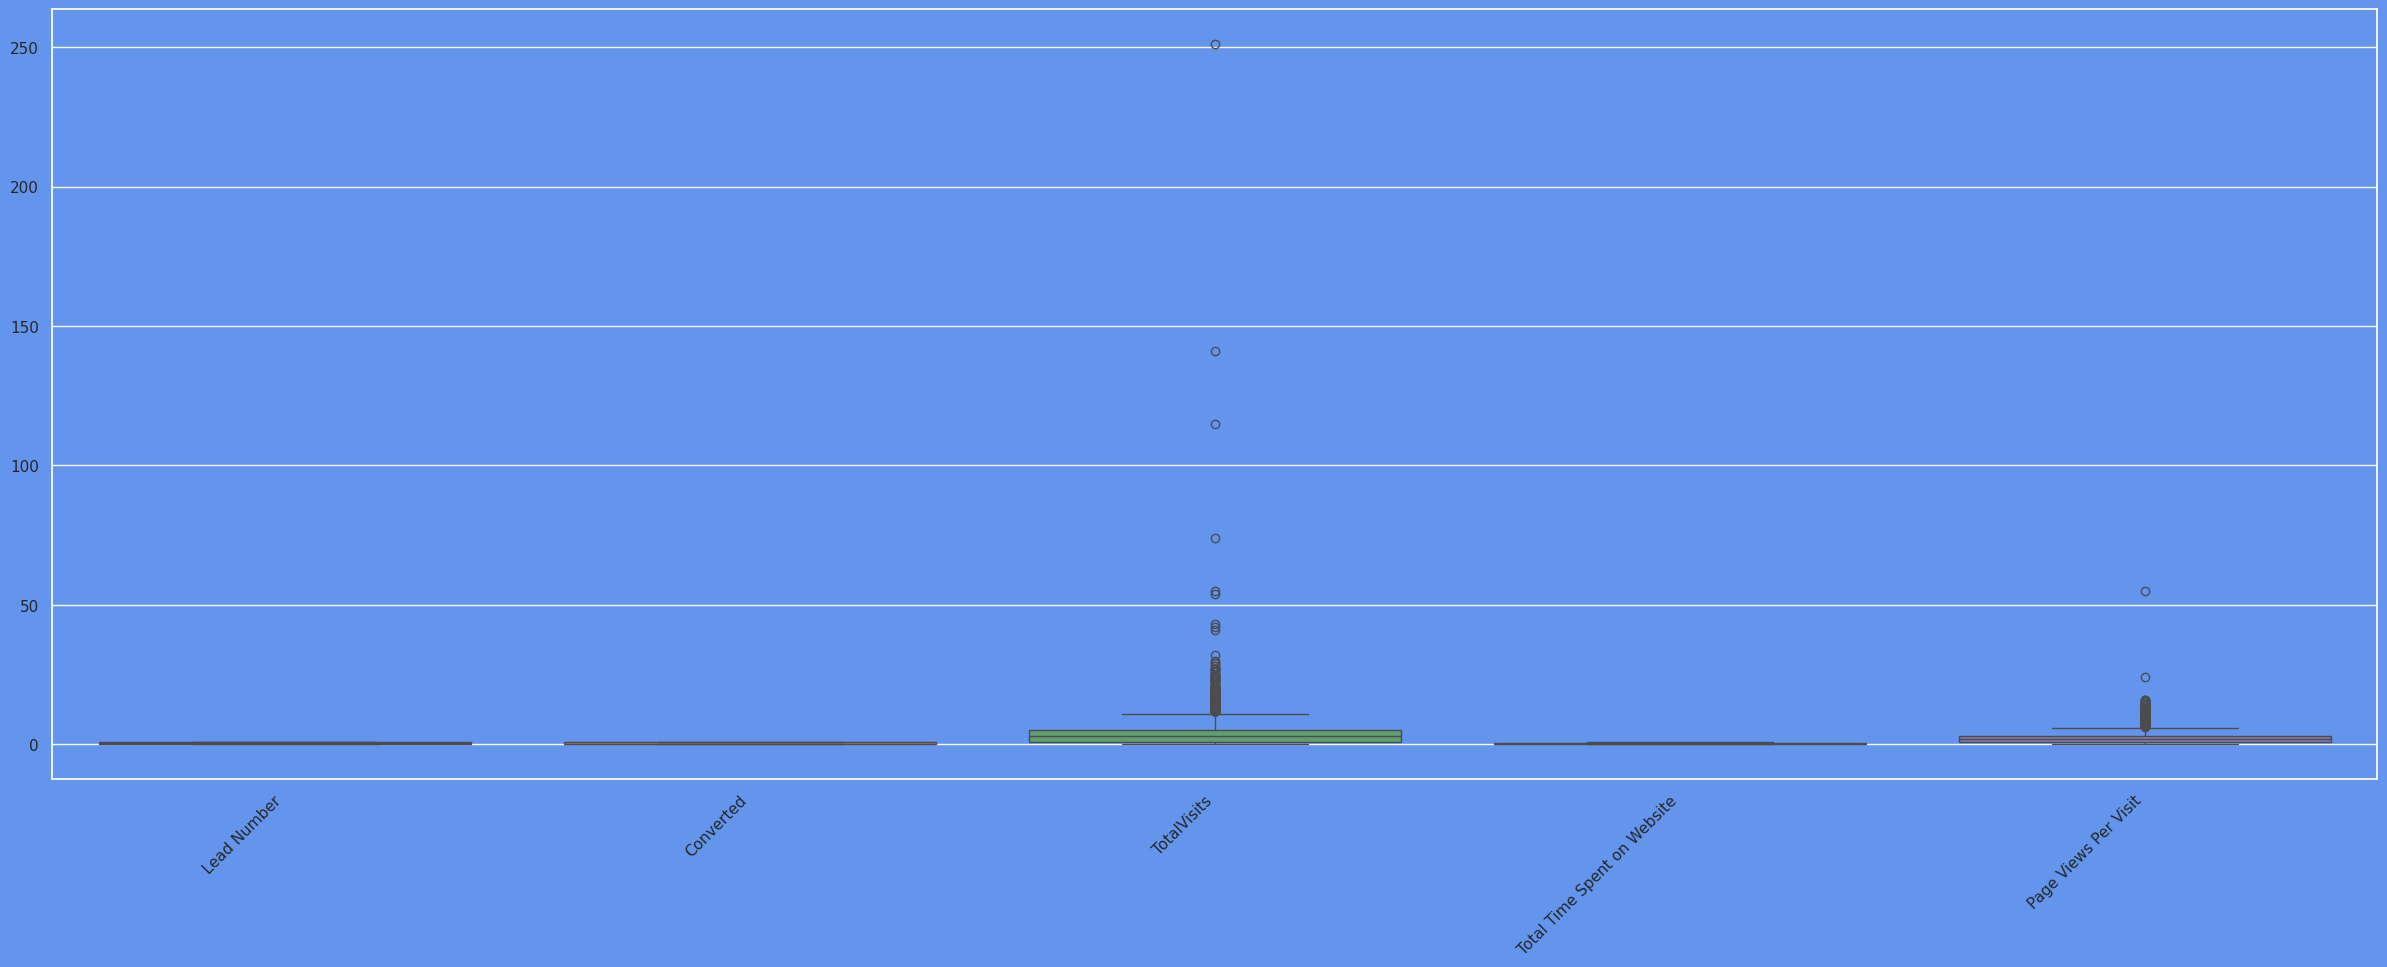

Number of columns after boxplot code: 5


In [558]:
# Assuming 'data' is your DataFrame
print("Number of columns before selection:", data.shape[1])

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
print("Number of numeric columns:", numeric_data.shape[1])

# Plot the boxplot
plt.figure(figsize=(30, 10))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Check the number of columns after the boxplot code
print("Number of columns after boxplot code:", numeric_data.shape[1])

# Above is the numeric distribution of all the numeric values

In [559]:
data

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620     1.000000   
1     2a272436-5132-4136-86fa-dcc88c88f482     0.999889   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a     0.999877   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc     0.999778   
4     3256f628-e534-4826-9d63-4a8b88782852     0.999310   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9     0.000382   
9236  82a7005b-7196-4d56-95ce-a79f937a158d     0.000160   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c     0.000148   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9     0.000062   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff     0.000000   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                     0.000000   
1             0          5.0                     0.296655   
2             1          2.0                     0.674296   
3             0          1.0                     0.134243   
4             1          2.0                     0.628521   
...         ...          ...                          ...   
9235          1          8.0                     0.812060   
9236          0          2.0                     0.104754   
9237          0          2.0                     0.087588   
9238          1          3.0                     0.219630   
9239          1          6.0                     0.562940   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website         India   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization What is your current occupation  \
0                        Select                      Unemployed   
1                        Select                      Unemployed   
2       Business Administration                         Student   
3         Media and Advertising                      Unemployed   
4                        Select                      Unemployed   
...                         ...                             ...   
9235     IT Projects Management                      Unemployed   
9236      Media and Advertising                      Unemployed   
9237    Business Administration                      Unemployed   
9238  Human Resource Management                      Unemployed   
9239    Supply Chain Management                      Unemployed   

     What matters most to you in choosing a course Search Magazine

In [560]:
data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [561]:
data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [562]:
data['Country'].unique()

array(['India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [563]:
data['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [564]:
# List of variables to drop.
#Dropping these variables as they have most of the values towards one attribute
#and using them might introduce bias in the model

columns_to_drop = ['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                   'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','What matters most to you in choosing a course']

In [565]:
data = data.drop(columns_to_drop,axis = 1)

In [566]:
data.shape

(9240, 16)

In [567]:
data.nunique()

Prospect ID                        9240
Lead Origin                           5
Lead Source                          21
Do Not Email                          2
Do Not Call                           2
Converted                             2
TotalVisits                          42
Total Time Spent on Website        1731
Page Views Per Visit                115
Last Activity                        17
Specialization                       20
What is your current occupation       6
Tags                                 26
Lead Quality                          5
City                                  7
Last Notable Activity                16
dtype: int64

In [568]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')


In [569]:
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}:", unique_values)
    print("\n")

Unique values in Prospect ID: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']


Unique values in Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']


Unique values in Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


Unique values in Do Not Email: ['No' 'Yes']


Unique values in Do Not Call: ['No' 'Yes']


Unique values in Last Activity: ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 

In [570]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Lead Origin'] = le.fit_transform(data['Lead Origin'])

In [571]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Lead Source'] = le.fit_transform(data['Lead Source'])

In [572]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = [
    'Last Activity', 'Specialization', 'What is your current occupation',
    'Tags', 'Lead Quality', 'City', 'Last Notable Activity'
]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

# Display the updated DataFrame
print(data.head())

                            Prospect ID  Lead Origin  Lead Source  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620            0            6   
1  2a272436-5132-4136-86fa-dcc88c88f482            0            7   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a            1            1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc            1            1   
4  3256f628-e534-4826-9d63-4a8b88782852            1            3   

  Do Not Email Do Not Call  Converted  TotalVisits  \
0           No          No          0          0.0   
1           No          No          0          5.0   
2           No          No          1          2.0   
3           No          No          0          1.0   
4           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Last Activity  \
0                     0.000000                   0.0             10   
1                     0.296655                   2.5              5   
2                     0.674296                 

In [637]:
categorical_fields.describe()

Lead Origin  Lead Source    Converted  TotalVisits  \
count  9240.000000  9240.000000  9240.000000  9240.000000   
mean      0.702489     4.220779     0.385390     3.445238   
std       0.633613     3.037586     0.486714     4.818723   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000   
50%       1.000000     3.000000     0.000000     3.000000   
75%       1.000000     6.000000     1.000000     5.000000   
max       4.000000    20.000000     1.000000   251.000000   

       Total Time Spent on Website  Page Views Per Visit  Last Activity  \
count                  9240.000000           9240.000000    9240.000000   
mean                      0.214656              2.362820       7.676407   
std                       0.241207              2.145333       3.653881   
min                       0.000000              0.000000       0.000000   
25%                       0.005282              1.000000       5.000000   
50%                       0.109155              2.000000       7.000000   
75%                       0.411972              3.000000      12.000000   
max                       1.000000             55.000000      16.000000   

       Specialization  What is your current occupation         Tags  \
count     9240.000000                      9240.000000  9240.000000   
mean        10.436255                         4.043506    15.201732   
std          5.235678                         0.357456     6.446781   
min          0.000000                         0.000000     0.000000   
25%          7.000000                         4.000000    14.000000   
50%         12.000000                         4.000000    19.000000   
75%         16.000000                         4.000000    19.000000   
max         19.000000                         5.000000    25.000000   

       Lead Quality         City  Last Notable Activity  
count   9240.000000  9240.000000            9240.000000  
mean       2.563203     1.725108               7.692208  
std        0.957088     1.970773               3.162836  
min        0.000000     0.000000               0.000000  
25%        2.000000     0.000000               4.000000  
50%        3.000000     0.000000               8.000000  
75%        3.000000     4.000000              10.000000  
max        4.000000     6.000000              15.000000

In [573]:
categorical_fields = data.copy()


# ** Model Calculation with outliers

11.	Remove outliers and keep outliers (does if have an effect of the final predictive model)? **



Correlation Matrix Values:
                                 Lead Origin  Lead Source  Converted  \
Lead Origin                         1.000000     0.047235   0.223725   
Lead Source                         0.047235     1.000000   0.171005   
Converted                           0.223725     0.171005   1.000000   
TotalVisits                         0.081491    -0.144136   0.030091   
Total Time Spent on Website         0.088852    -0.231865   0.362483   
Page Views Per Visit                0.149375    -0.237165  -0.003294   
Last Activity                       0.027978     0.054856   0.224844   
Specialization                     -0.331808     0.245094  -0.078472   
What is your current occupation     0.107812     0.056844   0.214057   
Tags                               -0.068906     0.013677   0.118375   
Lead Quality                       -0.248584    -0.134882  -0.551740   
City                               -0.036897     0.201955   0.141264   
Last Notable Activity               0

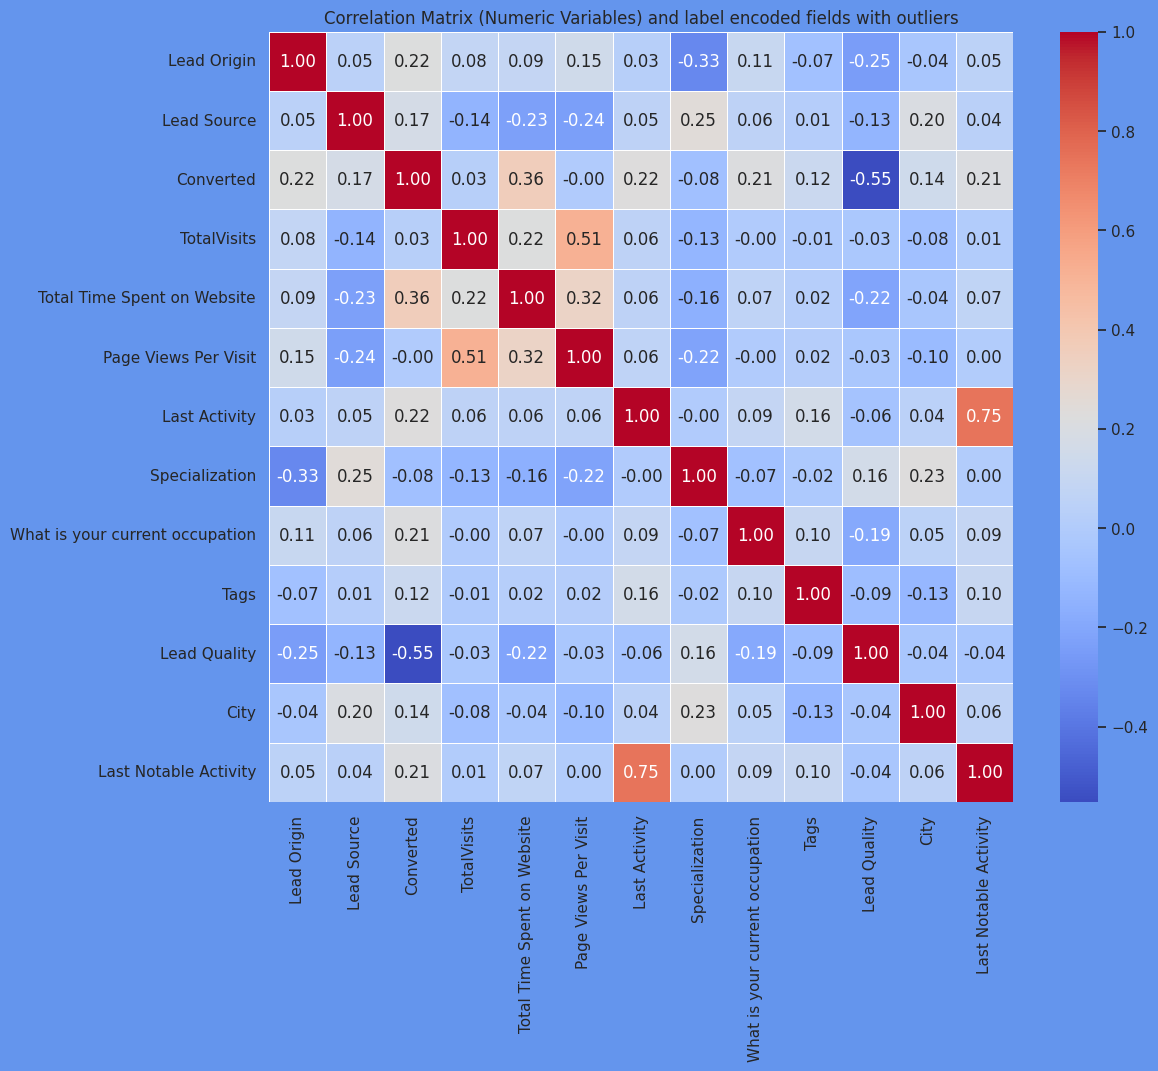

In [574]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
numeric_and_binary_data = data.select_dtypes(include=['number'])

# Create a correlation matrix for numeric and binary columns
correlation_matrix = numeric_and_binary_data.corr()
print("Correlation Matrix Values:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numeric Variables) and label encoded fields with outliers")
plt.show()

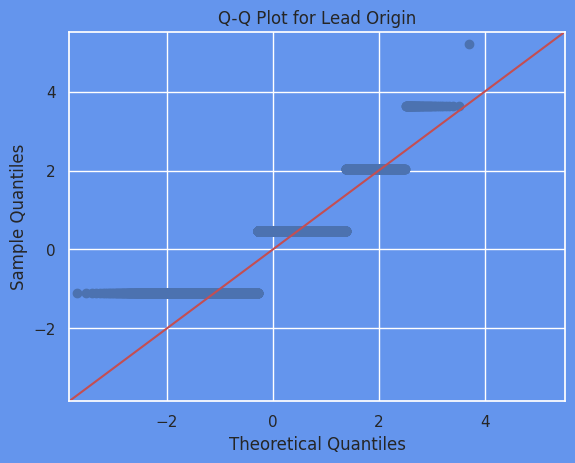

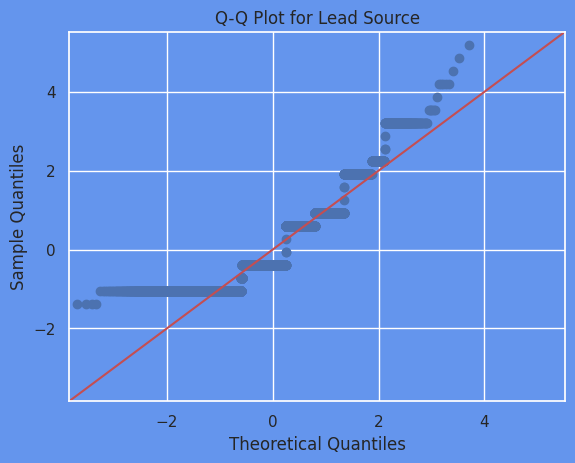

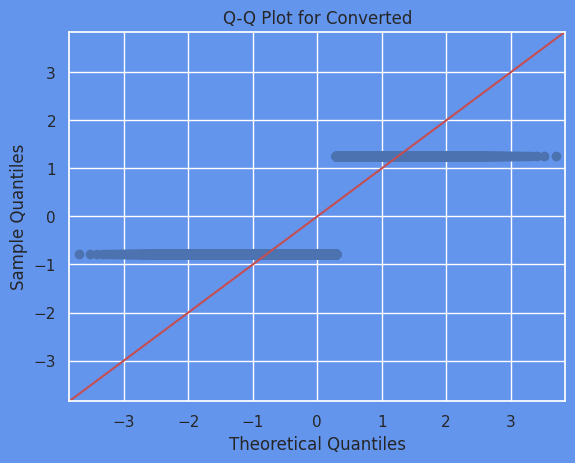

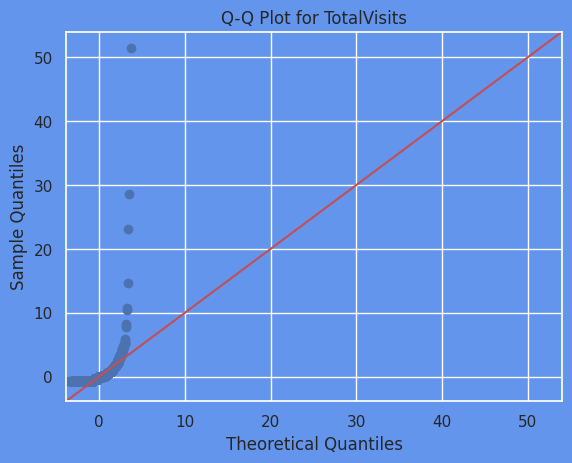

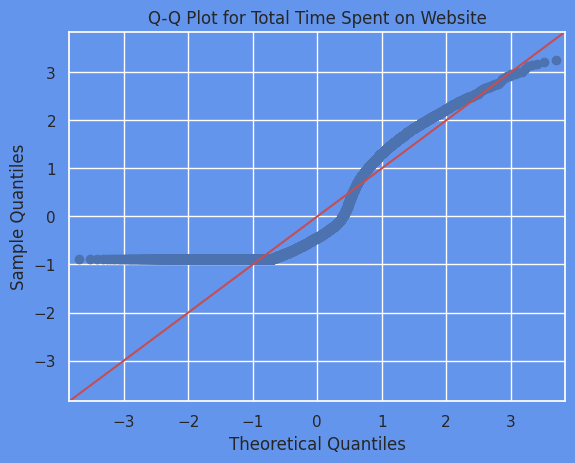

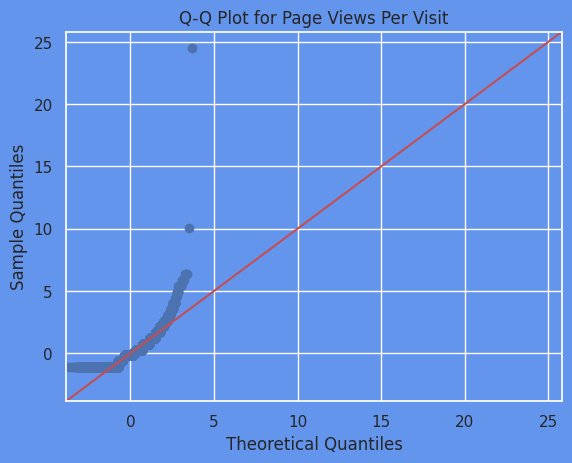

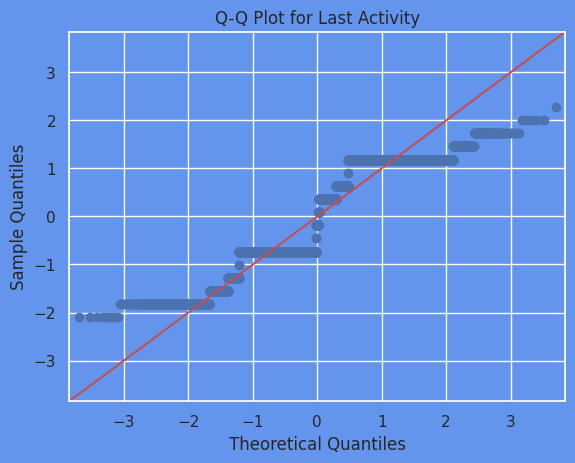

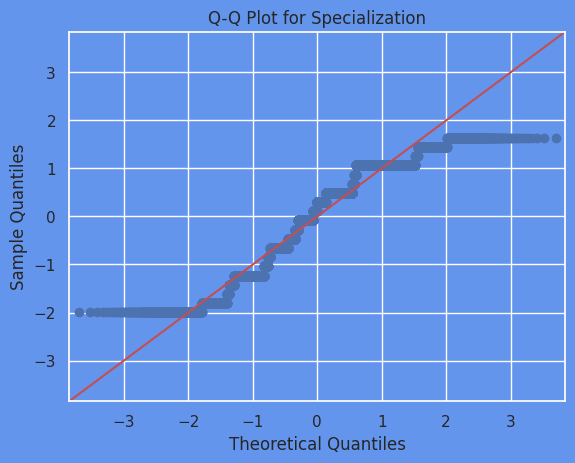

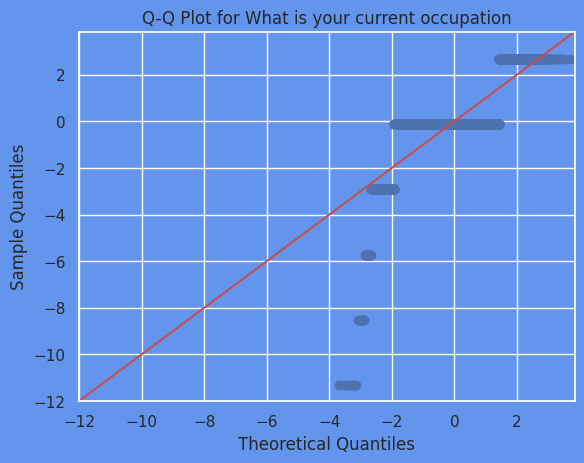

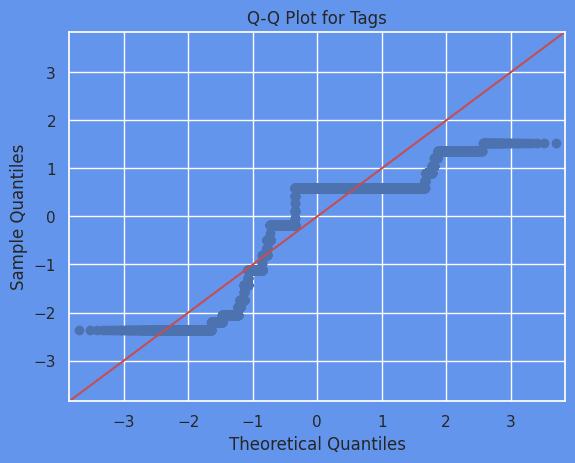

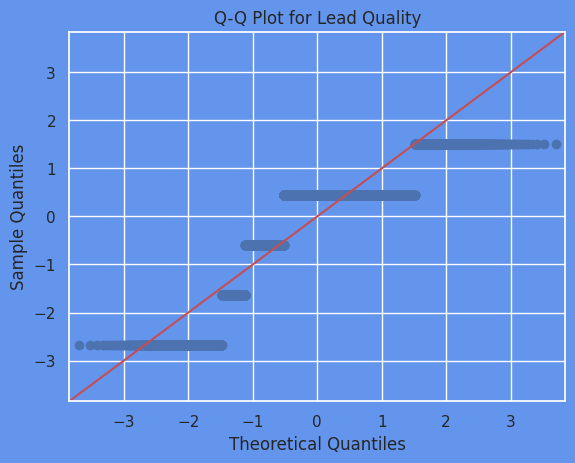

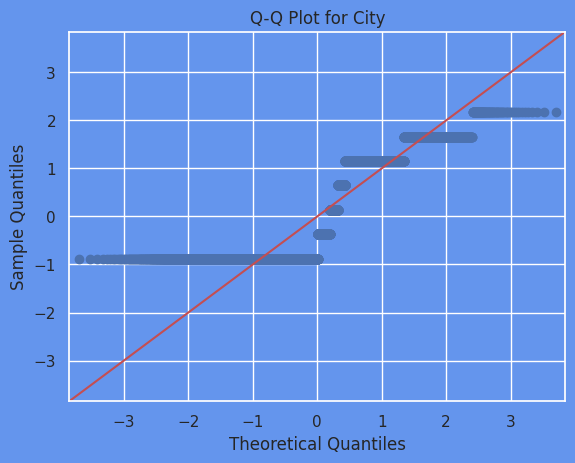

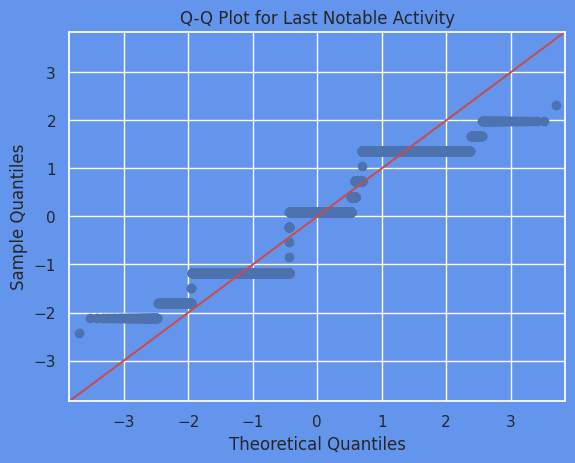

In [575]:
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg
import matplotlib.pyplot as plt

columns_for_qq_plot = numeric_and_binary_data.columns

# Loop through each column and create Q-Q plot
for column in columns_for_qq_plot:
    smg.qqplot(numeric_and_binary_data[column], line='45', fit=True)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()


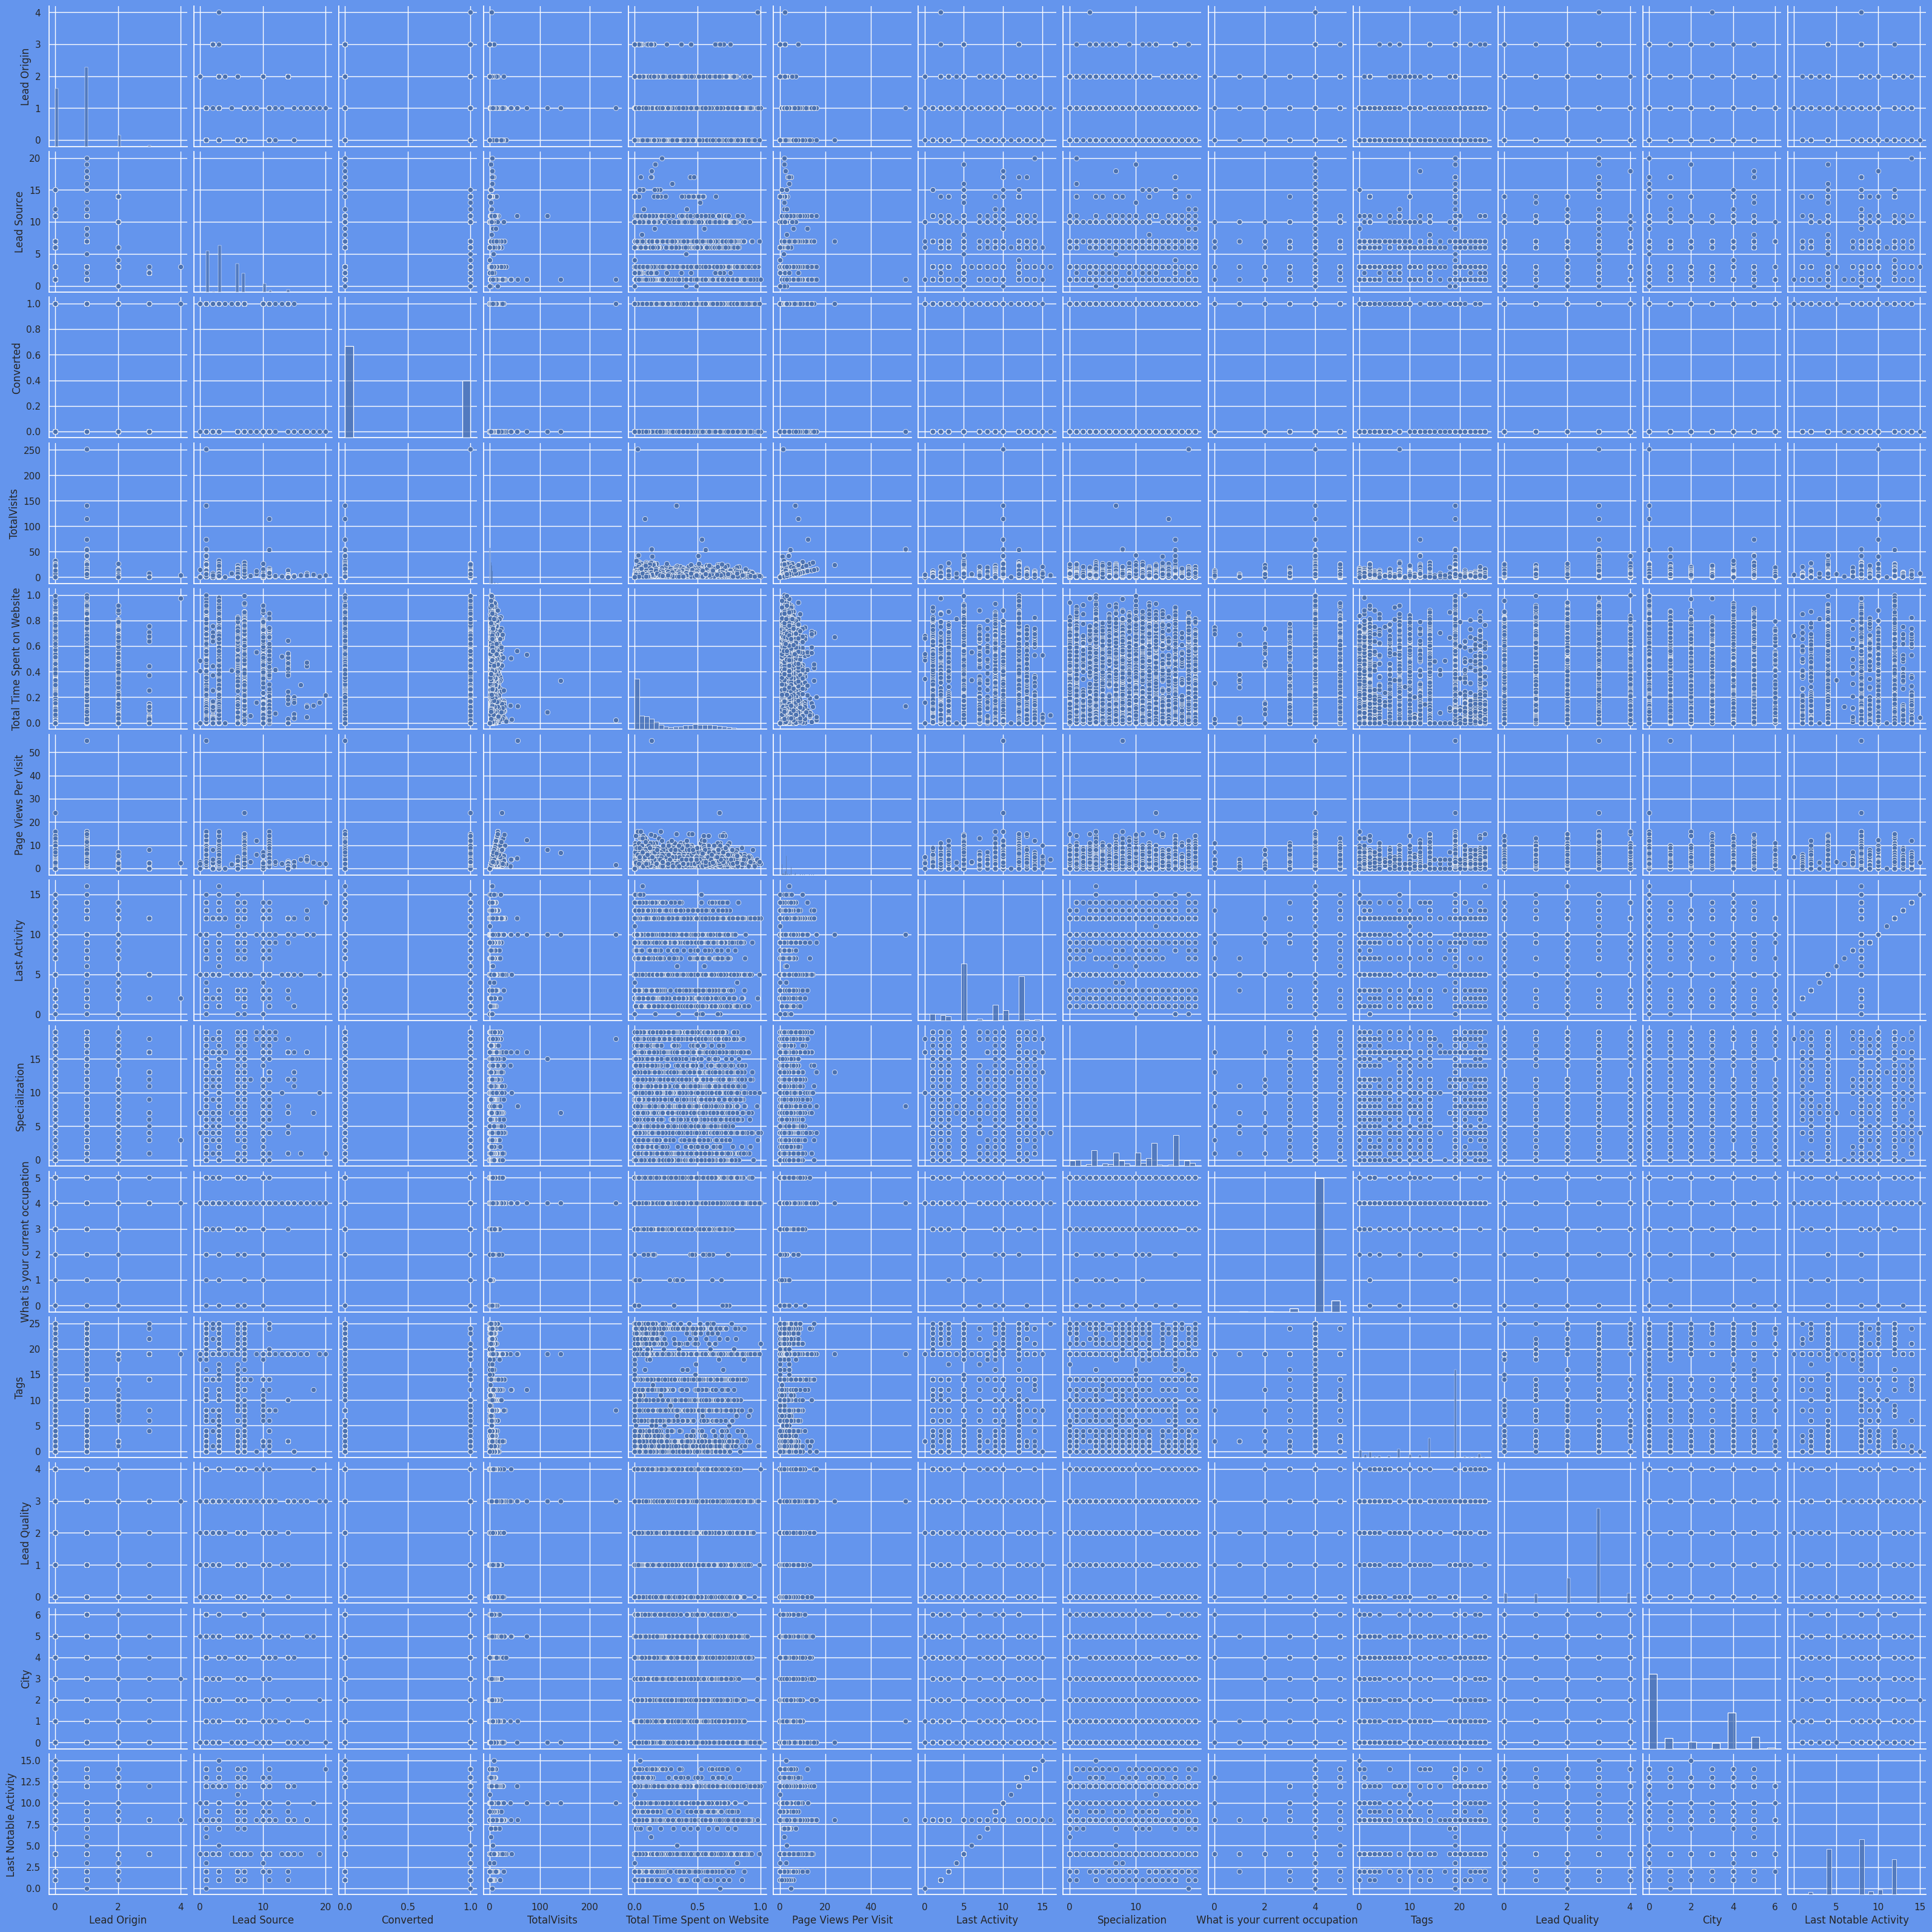

In [576]:
sns.pairplot(numeric_and_binary_data)


# **Feature Calculations**



1.   RFE
2.   Random Forest
3.   Permutation Importance:


In [577]:
correlation_matrix = numeric_and_binary_data.corr()
correlation_with_target = correlation_matrix['Converted'].sort_values(ascending=False)

print("\nCorrelation Analysis:")
print(correlation_with_target)


Correlation Analysis:
Converted                          1.000000
Total Time Spent on Website        0.362483
Last Activity                      0.224844
Lead Origin                        0.223725
What is your current occupation    0.214057
Last Notable Activity              0.210445
Lead Source                        0.171005
City                               0.141264
Tags                               0.118375
TotalVisits                        0.030091
Page Views Per Visit              -0.003294
Specialization                    -0.078472
Lead Quality                      -0.551740
Name: Converted, dtype: float64


In [578]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'numeric_and_binary_data' is your DataFrame
X = numeric_and_binary_data.drop('Converted', axis=1)
y = numeric_and_binary_data['Converted']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance_rf)


Random Forest Feature Importance:
Lead Quality                       0.243129
Tags                               0.195060
Total Time Spent on Website        0.174040
Last Notable Activity              0.074000
Last Activity                      0.049834
Specialization                     0.045112
Lead Origin                        0.042407
Lead Source                        0.039288
Page Views Per Visit               0.038826
TotalVisits                        0.037144
What is your current occupation    0.033546
City                               0.027614
dtype: float64


In [579]:
from sklearn.inspection import permutation_importance

# Get permutation importance
permutation_result = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)

# Display permutation importance
feature_importance_permutation = pd.Series(permutation_result.importances_mean, index=X_test.columns).sort_values(ascending=False)

print("\nPermutation Importance:")
print(feature_importance_permutation)


Permutation Importance:
Lead Quality                       0.126371
Tags                               0.126317
Total Time Spent on Website        0.035823
Last Notable Activity              0.022655
Specialization                     0.010372
Last Activity                      0.009470
Lead Origin                        0.006836
City                               0.005628
Lead Source                        0.005519
Page Views Per Visit               0.005393
TotalVisits                        0.004473
What is your current occupation    0.002507
dtype: float64


In [580]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'X' and 'y' with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier (you can use any model of your choice)
rf_model = RandomForestClassifier()

# Create an RFE model with the Random Forest classifier
rfe = RFE(estimator=rf_model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Print the ranking of features after RFE
feature_ranking_rfe = pd.Series(rfe.ranking_, index=X_train.columns).sort_values()
print("Feature Ranking (RFE):")
print(feature_ranking_rfe)

# Select the top 'k' features (you can choose based on your requirement)
top_features = feature_ranking_rfe.head(5).index

# Subset your data with the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Fit a model with the top features
rf_model_top = RandomForestClassifier()
rf_model_top.fit(X_train_top, y_train)

# Get permutation importance for the top features
permutation_result_top = permutation_importance(rf_model_top, X_test_top, y_test, n_repeats=30, random_state=42)

# Display permutation importance for the top features
feature_importance_permutation_top = pd.Series(permutation_result_top.importances_mean, index=X_test_top.columns).sort_values(ascending=False)
print("\nPermutation Importance (Top Features from RFE):")
print(feature_importance_permutation_top)


Feature Ranking (RFE):
Total Time Spent on Website         1
Lead Quality                        2
Tags                                3
Last Notable Activity               4
Specialization                      5
Lead Origin                         6
Page Views Per Visit                7
Last Activity                       8
Lead Source                         9
TotalVisits                        10
What is your current occupation    11
City                               12
dtype: int64

Permutation Importance (Top Features from RFE):
Tags                           0.178157
Lead Quality                   0.132684
Last Notable Activity          0.067280
Total Time Spent on Website    0.040855
Specialization                 0.024423
dtype: float64


In [581]:
numeric_and_binary_data.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

# **Model Training starts here**

In [582]:
import statsmodels.api as sm

model = sm.OLS(
    numeric_and_binary_data["Converted"],
    numeric_and_binary_data[
        [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
        ]
    ],
).fit()

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Converted   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                              1550.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:10:17   Log-Likelihood:                         -3606.7
No. Observations:                9240   AIC:                                      7237.
Df Residuals:                    9228   BIC:                                      7323.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Lead Origin                         0.0741      0.006     11.487      0.000       0.061       0.087
Lead Source                         0.0201      0.001     14.798      0.000       0.017       0.023
TotalVisits                         0.0016      0.001      1.731      0.083      -0.000       0.003
Total Time Spent on Website         0.6254      0.017     36.613      0.000       0.592       0.659
Page Views Per Visit               -0.0236      0.002    -11.049      0.000      -0.028      -0.019
Last Activity                       0.0153      0.002      9.822      0.000       0.012       0.018
Specialization                      0.0002      0.001      0.225      0.822      -0.001       0.002
What is your current occupation     0.0989      0.005     20.099      0.000       0.089       0.109
Tags                                0.0049      0.001      8.188      0.000       0.004       0.006
Lead Quality                       -0.2110      0.004    -53.751      0.000      -0.219      -0.203
City                                0.0250      0.002     12.572      0.000       0.021       0.029
Last Notable Activity               0.0090      0.002      5.075      0.000       0.006       0.012
==============================================================================
Omnibus:                      284.082   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.518
Skew:                           0.448   Prob(JB):                     3.73e-68
Kurtosis:                       2.952   Cond. No.                         108.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [583]:
from sklearn.model_selection import train_test_split

X = numeric_and_binary_data[
        [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
        ]
    ]
y = numeric_and_binary_data["Converted"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

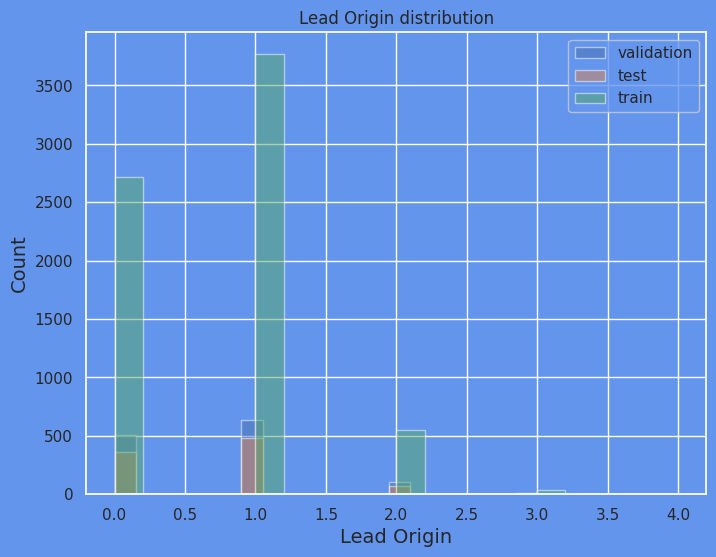

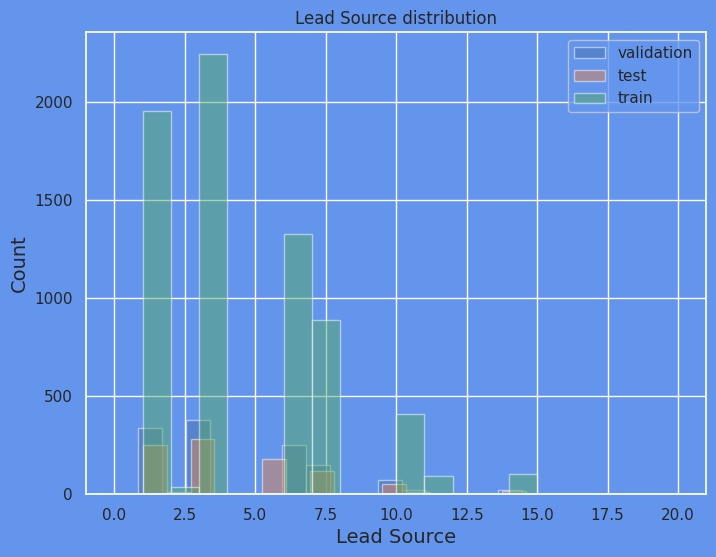

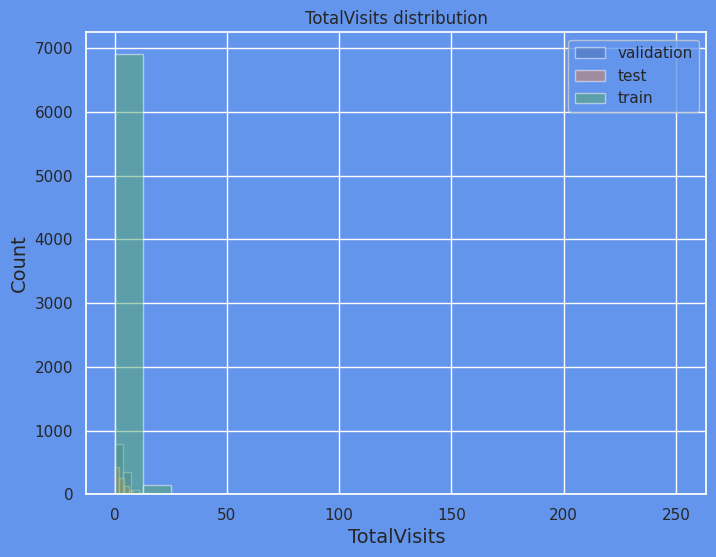

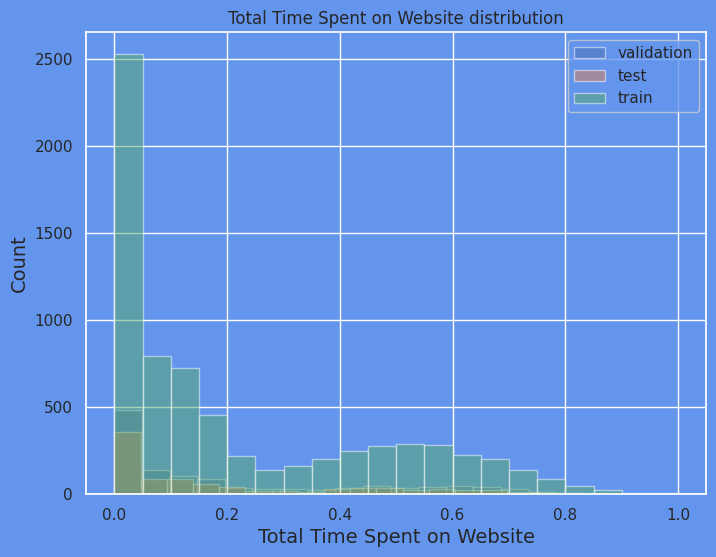

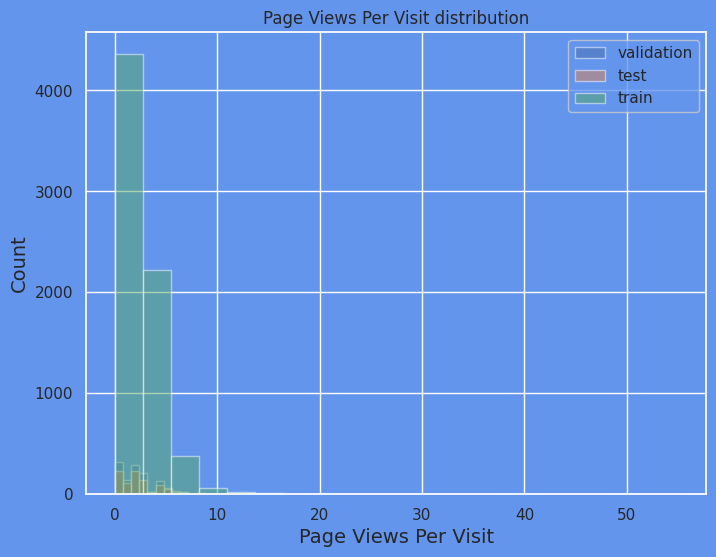

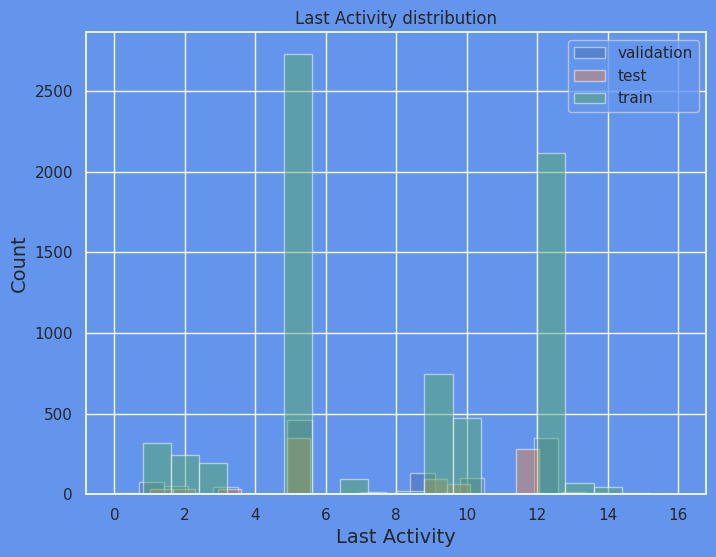

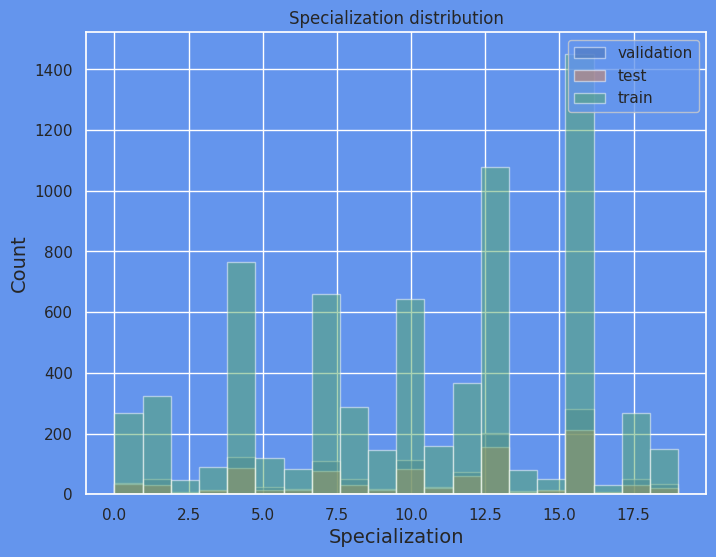

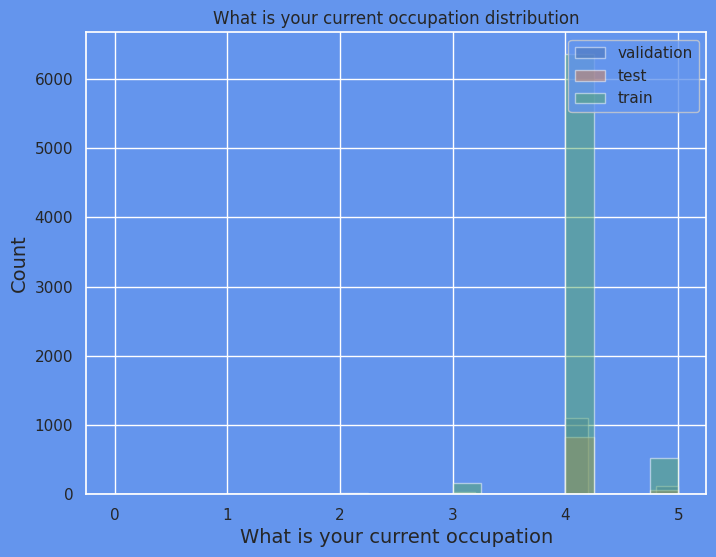

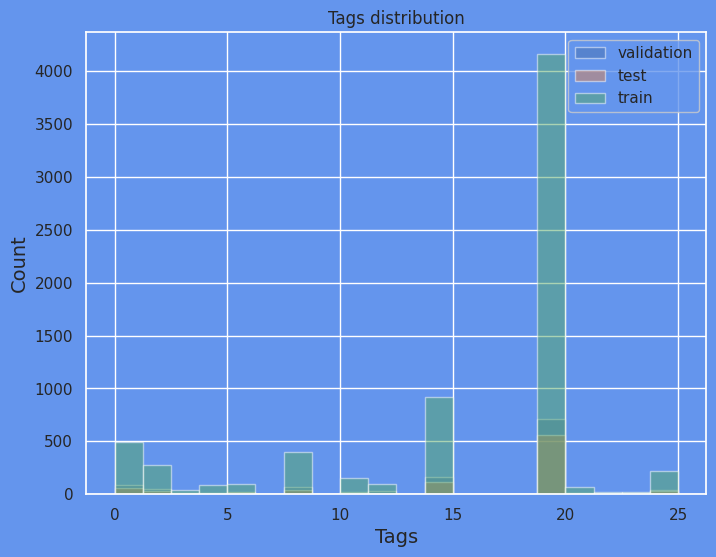

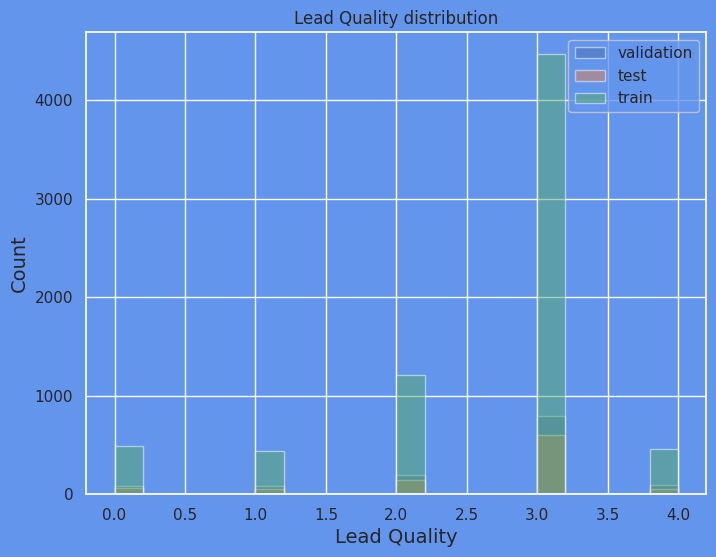

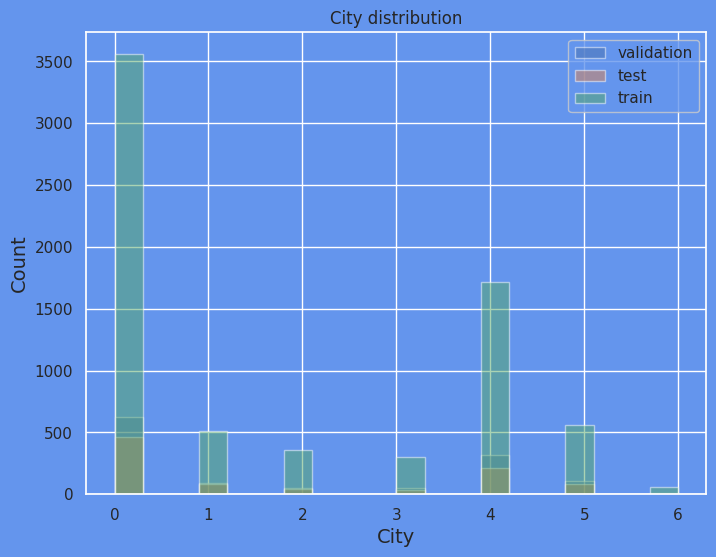

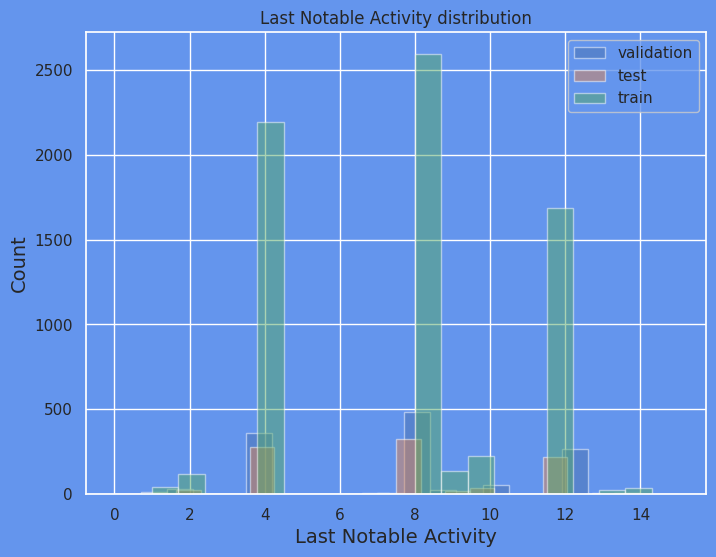

In [584]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
    ]
]

X_val_plot = X_val[
    [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
    ]
]

X_train_plot = X_train[
    [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()


In [585]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

Coefficients: [ 0.07412628  0.01949143  0.00194584  0.63926605 -0.02459871  0.01566947
  0.00063942  0.09794187  0.0046459  -0.20795476  0.02543246  0.00890744]
Intercept: -0.005622469387145945


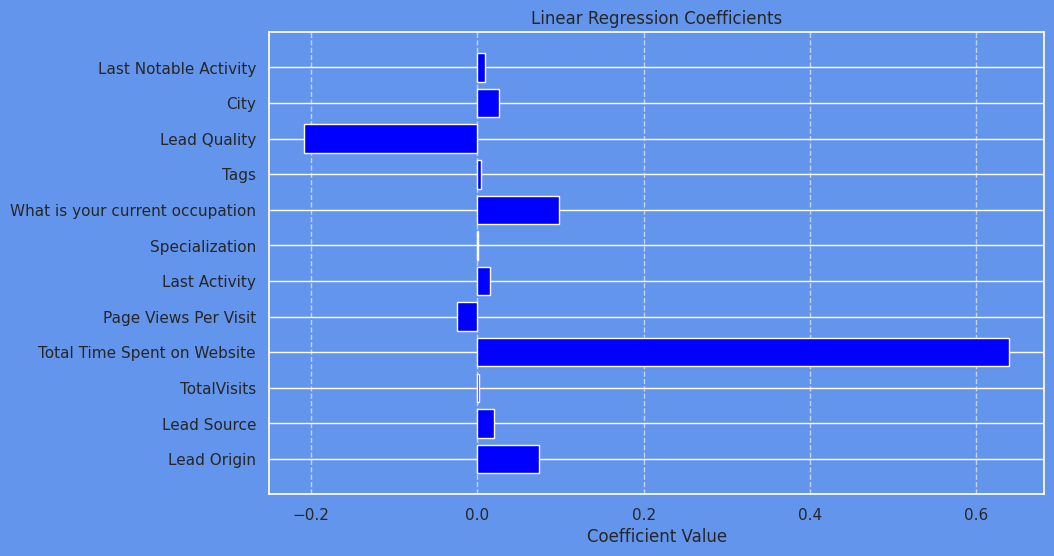

In [586]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)


coefficients = regr.coef_
feature_names = X_train.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [587]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on training set =", r2)

Mean squared error: 0.13
Coefficient of determination: 0.46
R^2 score on training set = 0.4582526522327369


In [588]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.13
Coefficient of determination: 0.45
R^2 score on test set = 0.44850592595478433


In [589]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.12
Coefficient of determination: 0.48
R^2 score on validation set = 0.4788632410834067


In [590]:
from sklearn.inspection import permutation_importance

# Assuming 'regr' is your regression model, and 'X_test', 'y_test' are your test data
result = permutation_importance(regr, X_test, y_test, random_state=1)

# Display the weights along with feature names
weights = result.importances_mean
std_devs = result.importances_std
feature_names = X_test.columns.tolist()

for weight, std_dev, feature_name in zip(weights, std_devs, feature_names):
    print(f"{weight:.4f} ± {std_dev:.4f}\t{feature_name}")



0.0186 ± 0.0030	Lead Origin
0.0325 ± 0.0091	Lead Source
0.0001 ± 0.0008	TotalVisits
0.1835 ± 0.0205	Total Time Spent on Website
0.0283 ± 0.0035	Page Views Per Visit
0.0298 ± 0.0081	Last Activity
-0.0003 ± 0.0003	Specialization
0.0074 ± 0.0039	What is your current occupation
0.0101 ± 0.0039	Tags
0.3262 ± 0.0167	Lead Quality
0.0244 ± 0.0027	City
0.0084 ± 0.0023	Last Notable Activity



**5.	Which independent variables have missing data? How much?**

**There are no null values**

Number of columns before selection: 16
Number of numeric columns: 13


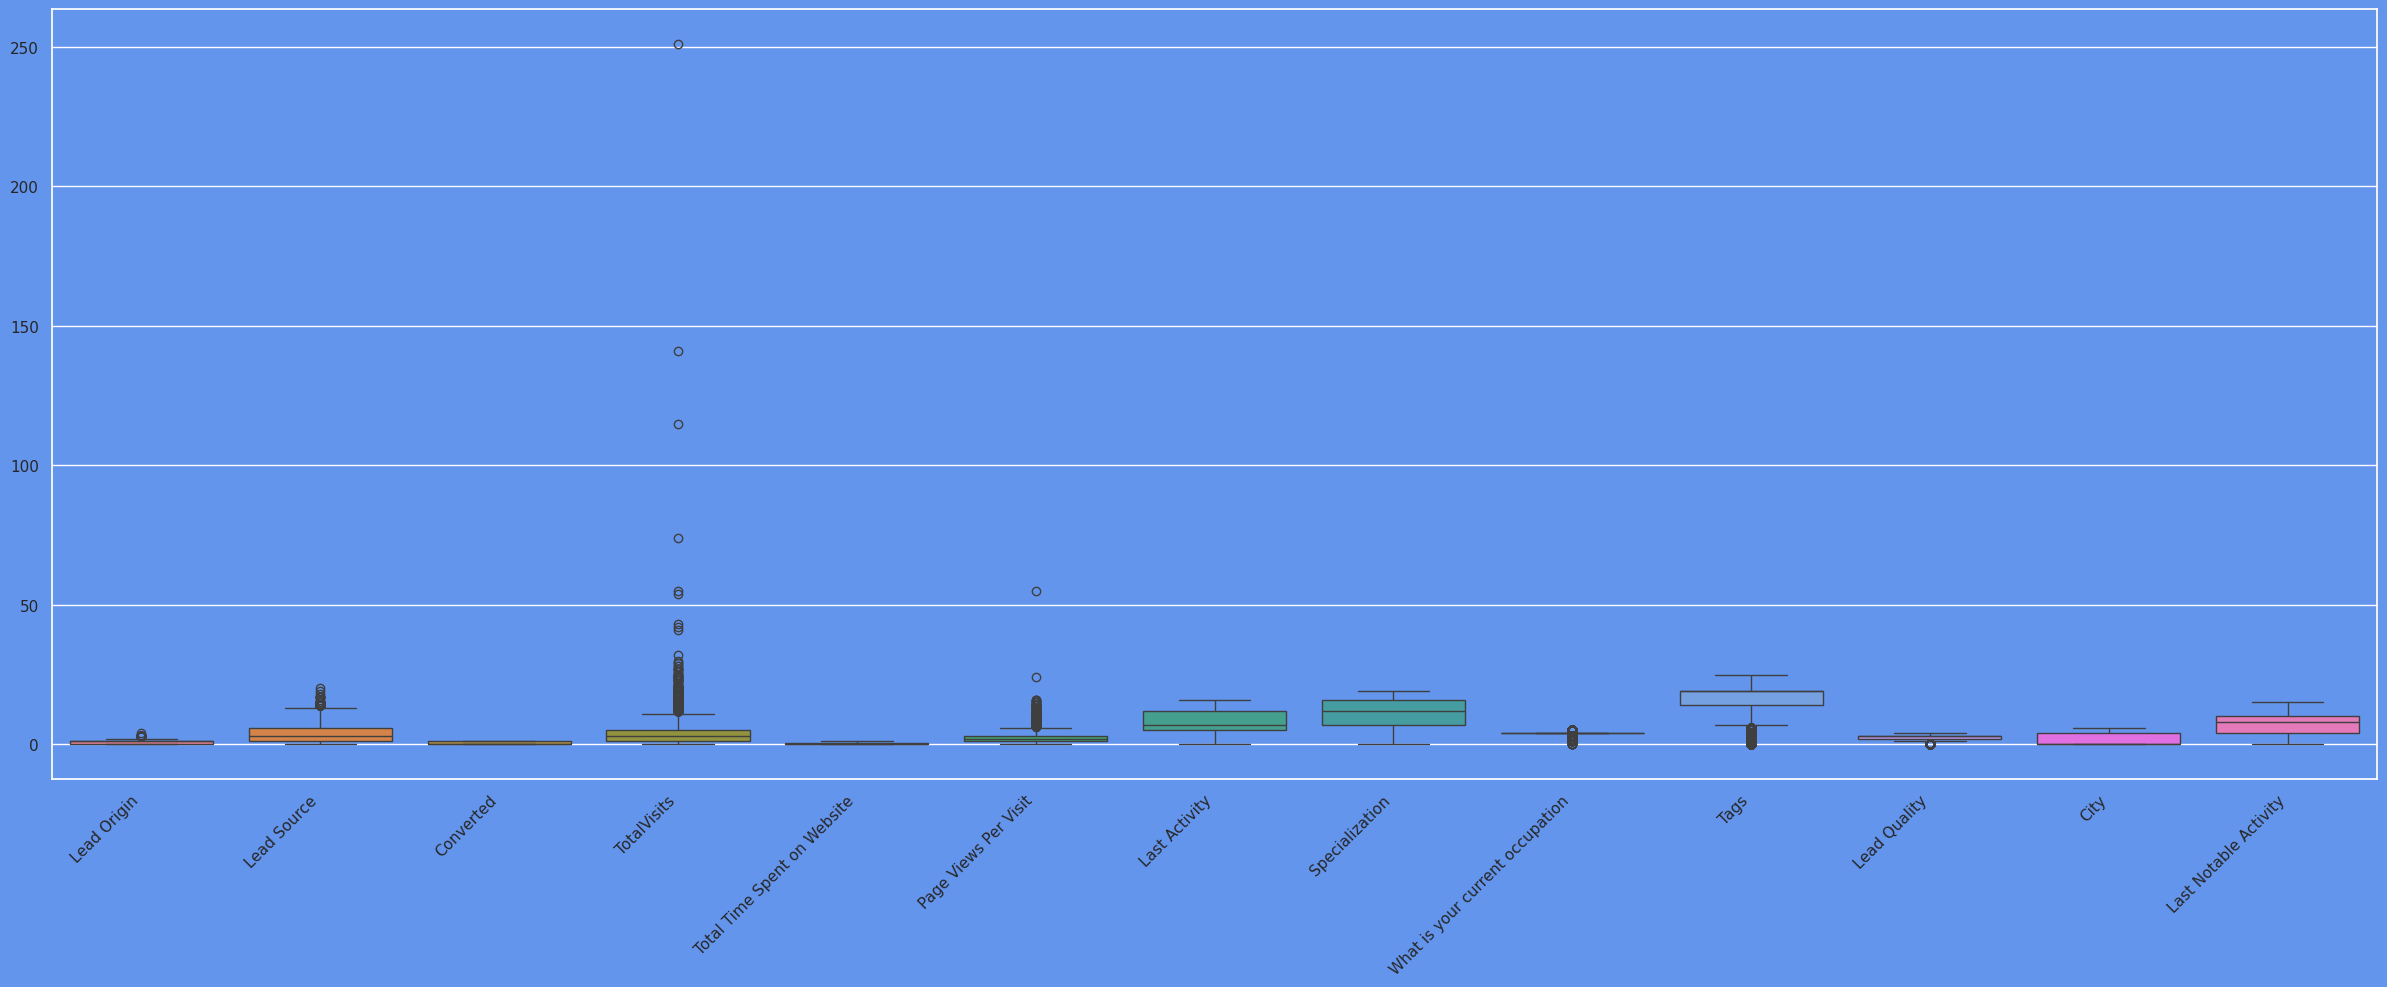

Number of columns after boxplot code: 13


In [591]:
print("Number of columns before selection:", data.shape[1])

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
print("Number of numeric columns:", numeric_data.shape[1])

# Plot the boxplot
plt.figure(figsize=(30, 10))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Check the number of columns after the boxplot code
print("Number of columns after boxplot code:", numeric_data.shape[1])


# **final predictive model calculations after removal of outliers**

Number of columns before selection: 16
Number of numeric columns: 13


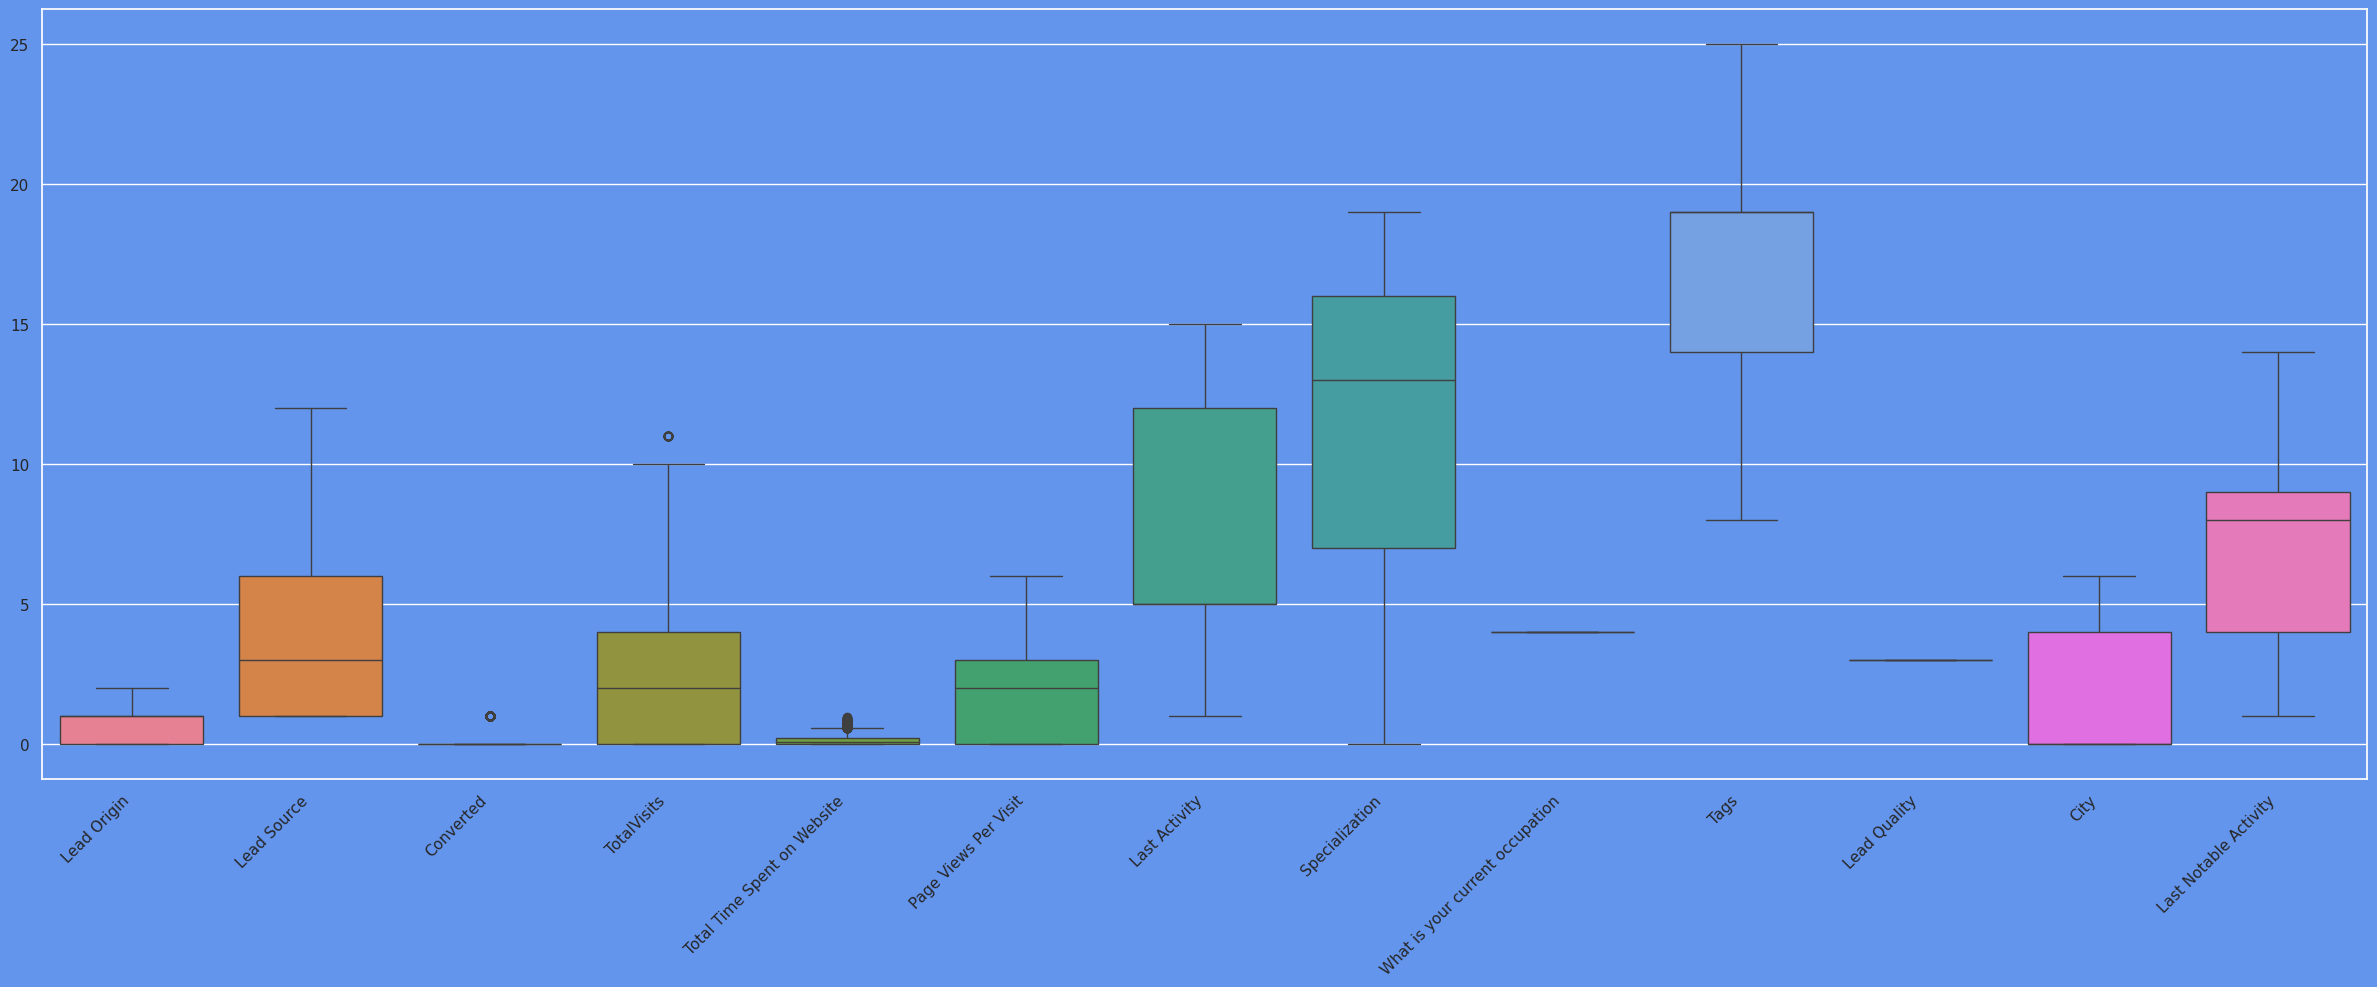

Number of columns after boxplot code: 13


In [592]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original DataFrame

print("Number of columns before selection:", data.shape[1])

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
print("Number of numeric columns:", numeric_data.shape[1])

# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from each numeric column
for column in numeric_data.columns:
    numeric_data = remove_outliers(numeric_data, column)

# Plot the boxplot after removing outliers
plt.figure(figsize=(30, 10))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Check the number of columns after the boxplot code
print("Number of columns after boxplot code:", numeric_data.shape[1])

Number of columns before selection: 16
Number of numeric columns: 13


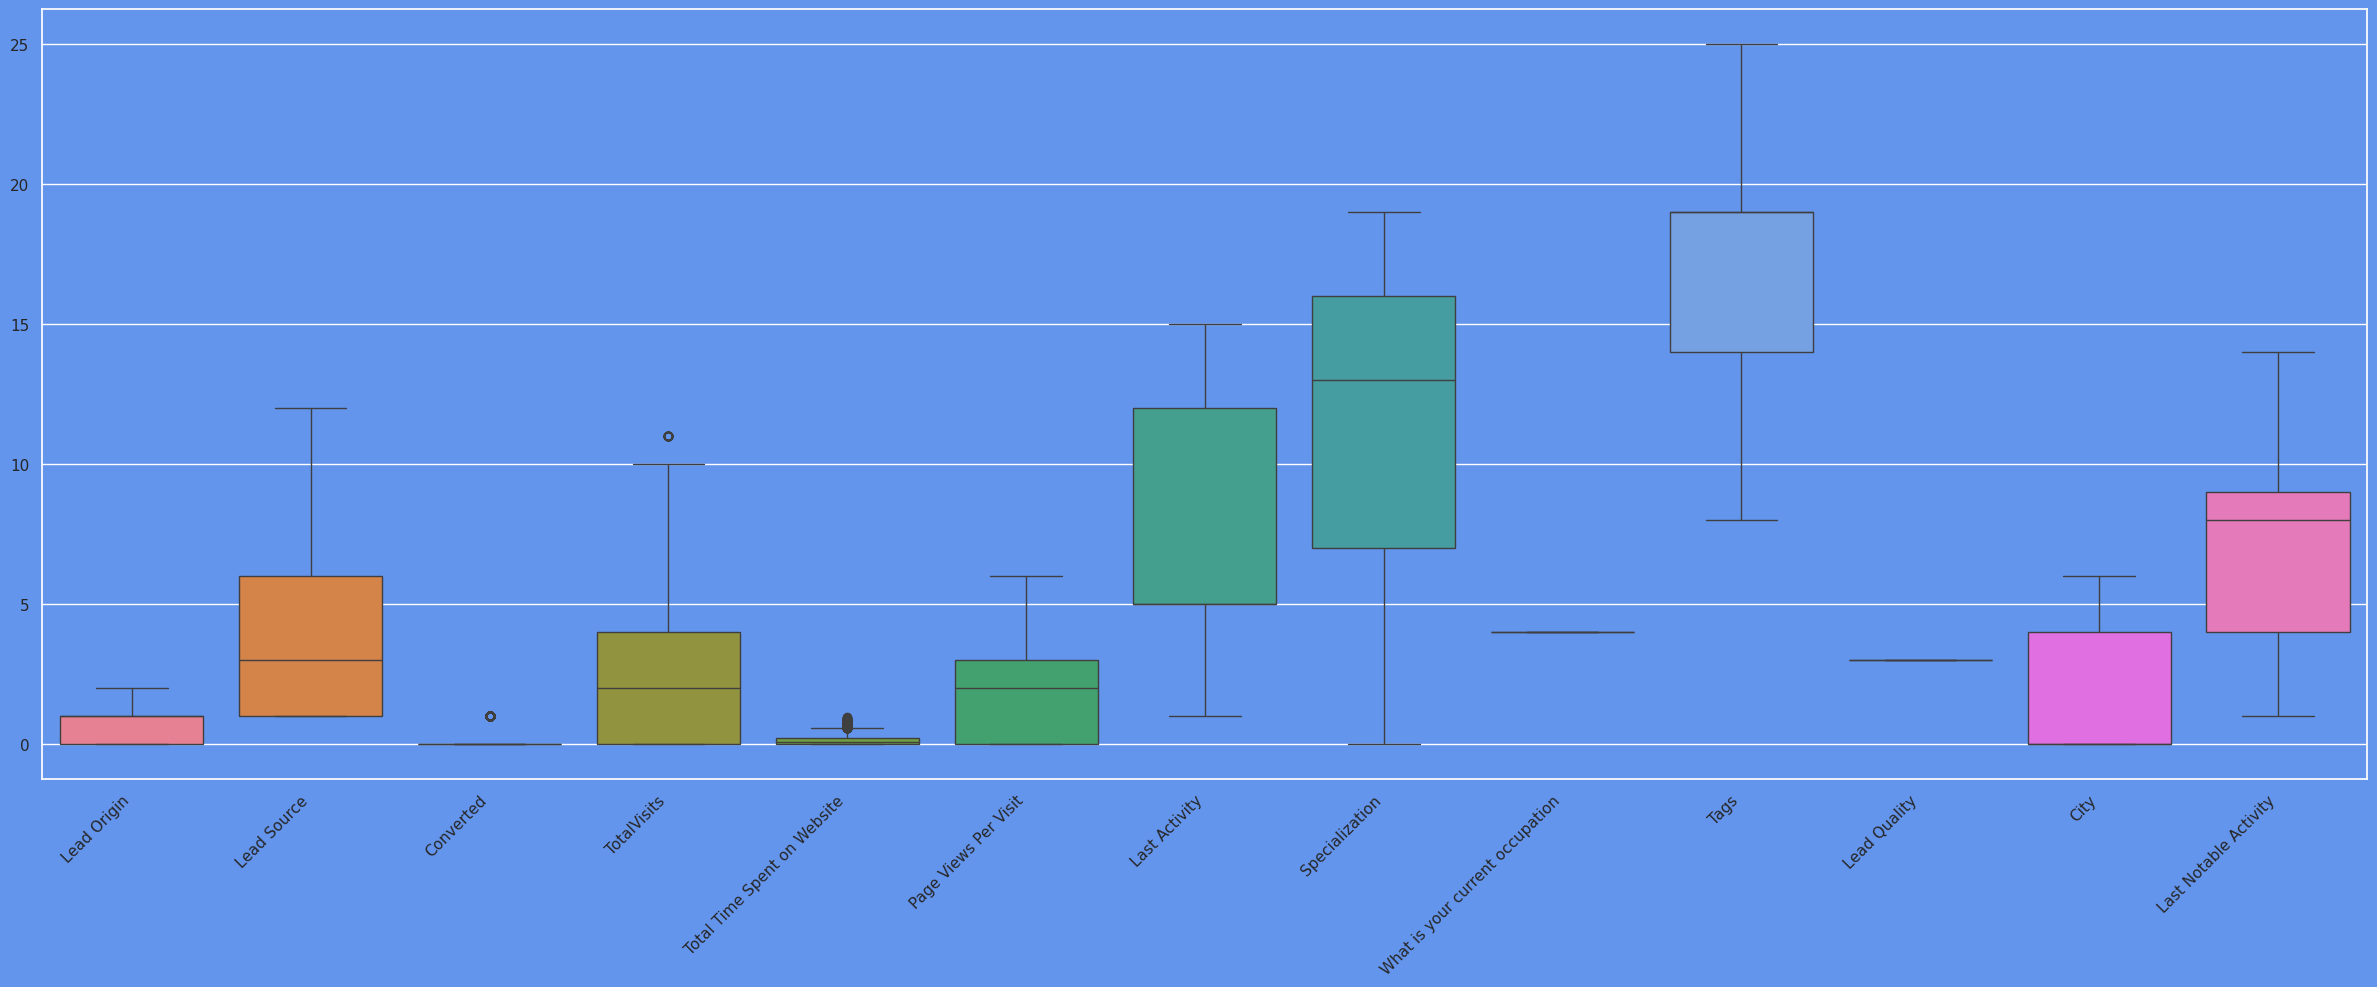

Number of columns after boxplot code: 13


In [593]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Number of columns before selection:", data.shape[1])

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
print("Number of numeric columns:", numeric_data.shape[1])

# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from each numeric column
numeric_data_without_outliers = numeric_data.copy()  # Create a copy to preserve the original data
for column in numeric_data.columns:
    numeric_data_without_outliers = remove_outliers(numeric_data_without_outliers, column)

# Plot the boxplot after removing outliers
plt.figure(figsize=(30, 10))
sns.boxplot(data=numeric_data_without_outliers)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Check the number of columns after the boxplot code
print("Number of columns after boxplot code:", numeric_data_without_outliers.shape[1])


Co Relation Marix is unchanged from data with and without outliers

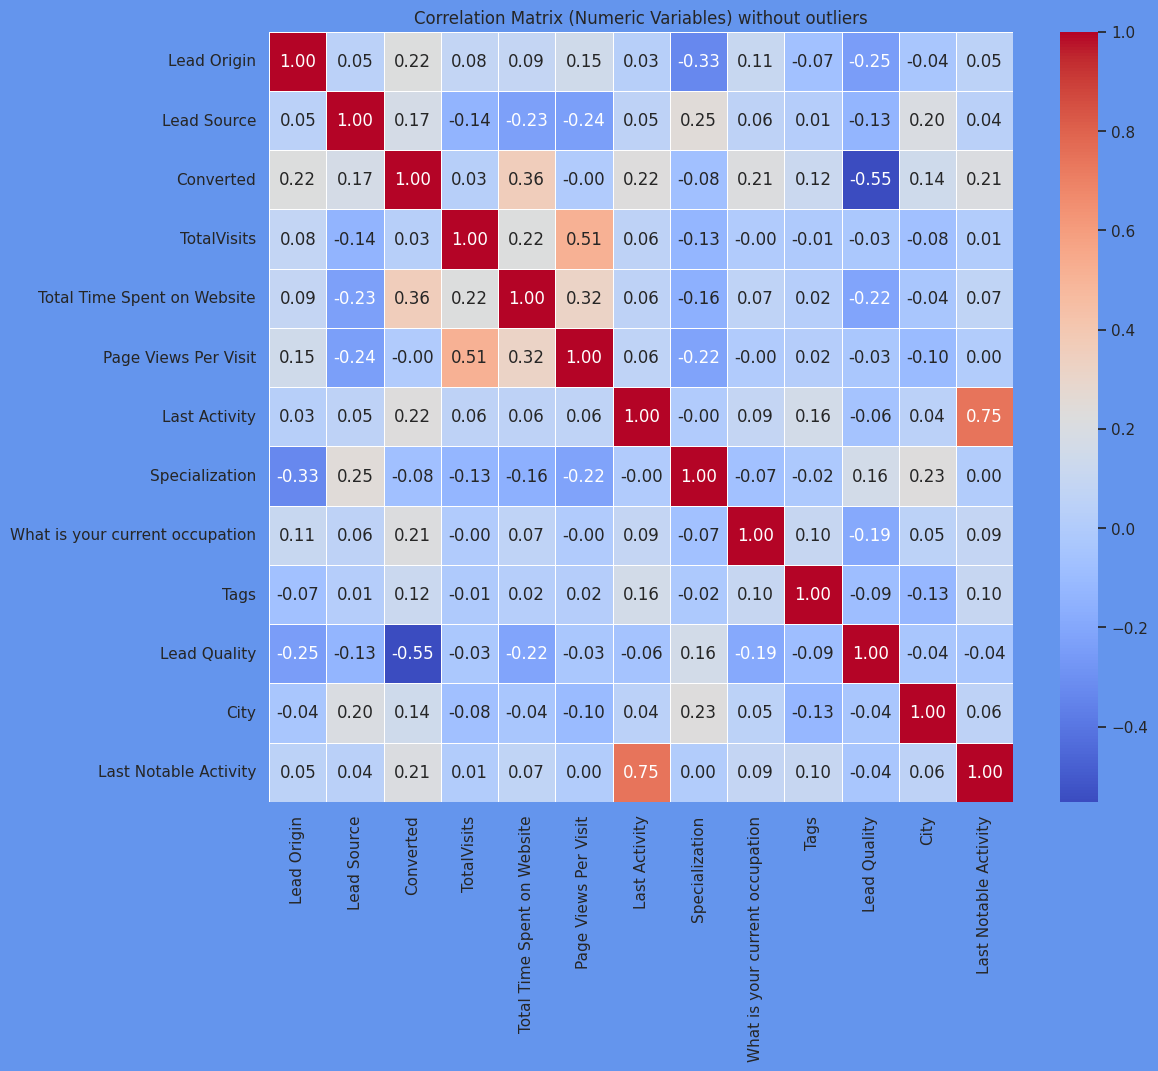

In [594]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data_without_outliers = data.select_dtypes(include=['number'])

# Create a correlation matrix for numeric and binary columns without outliers
correlation_matrix_without_outliers = numeric_data_without_outliers.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_without_outliers, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numeric Variables) without outliers")
plt.show()


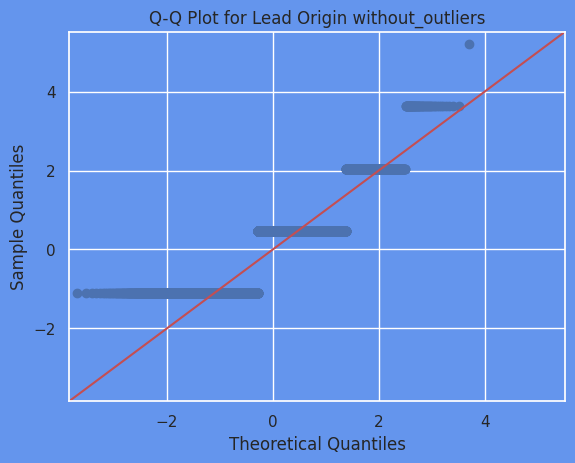

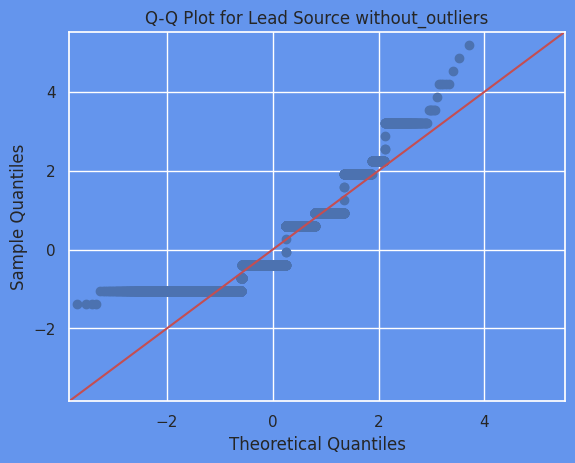

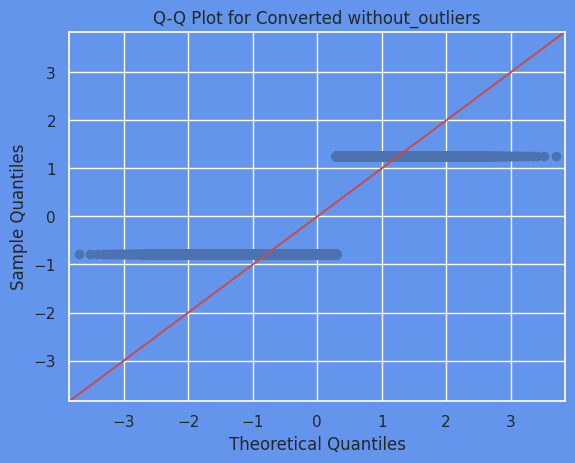

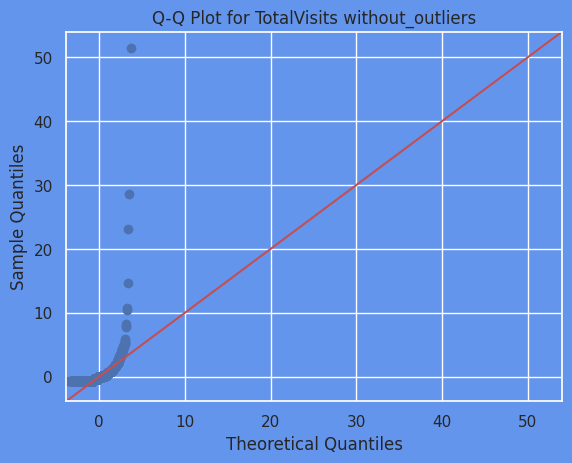

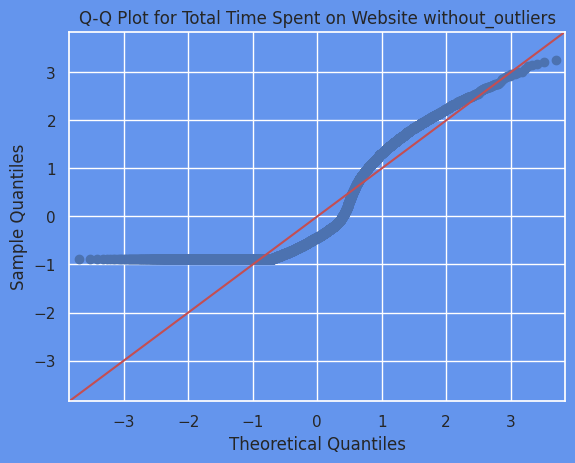

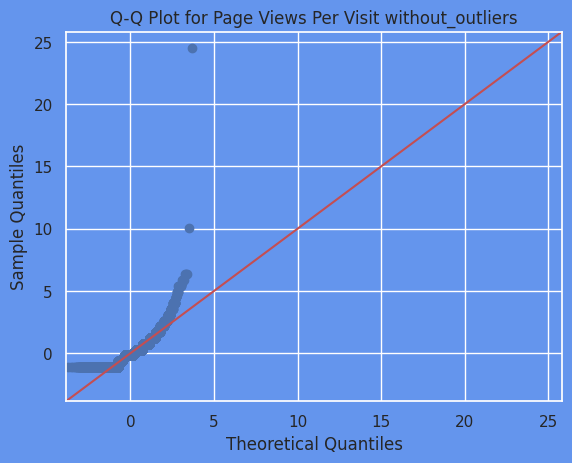

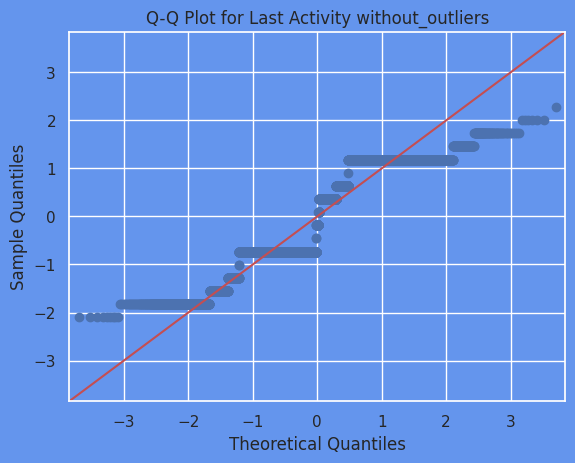

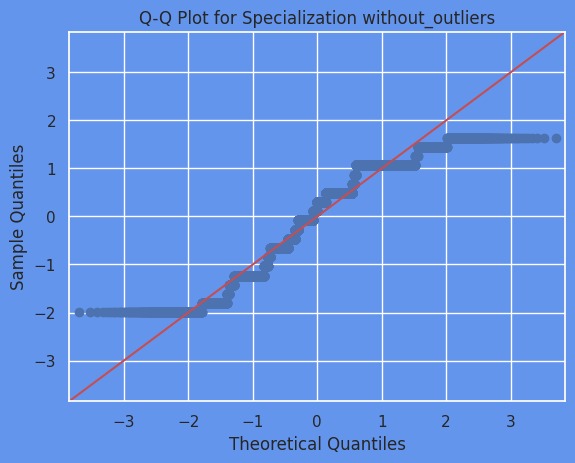

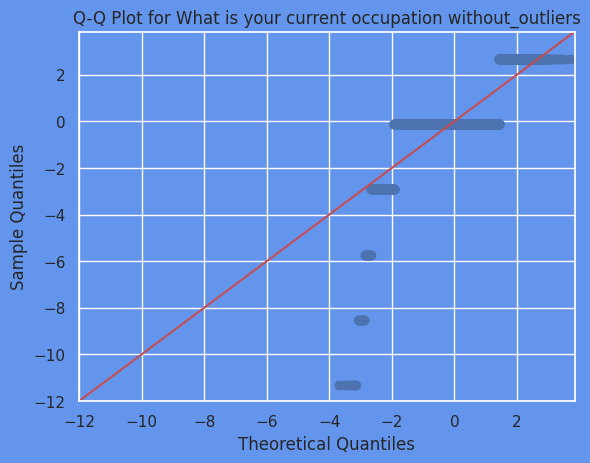

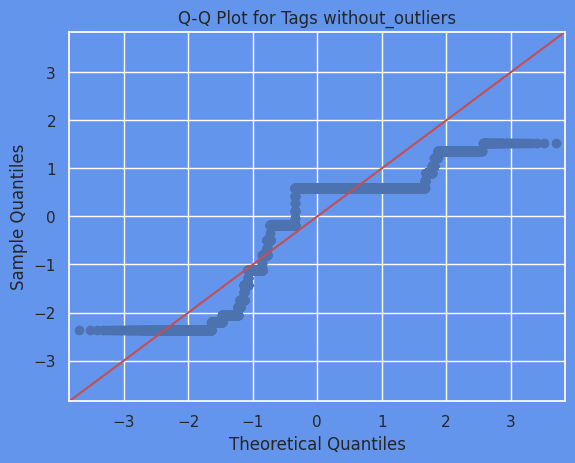

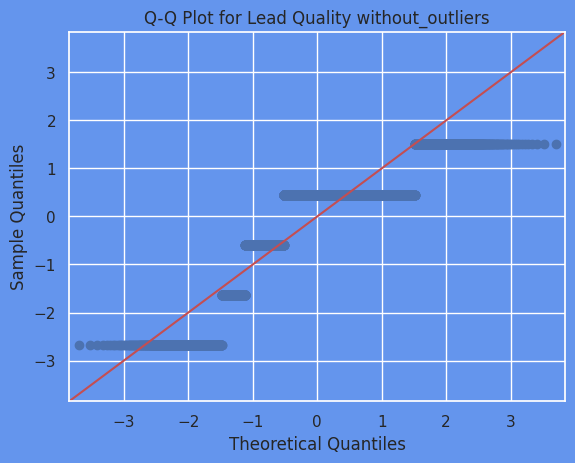

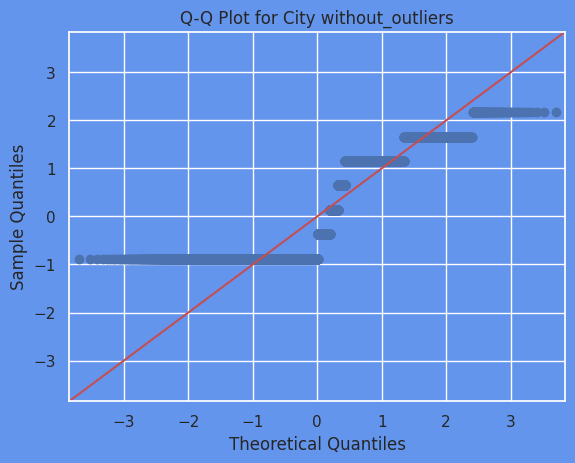

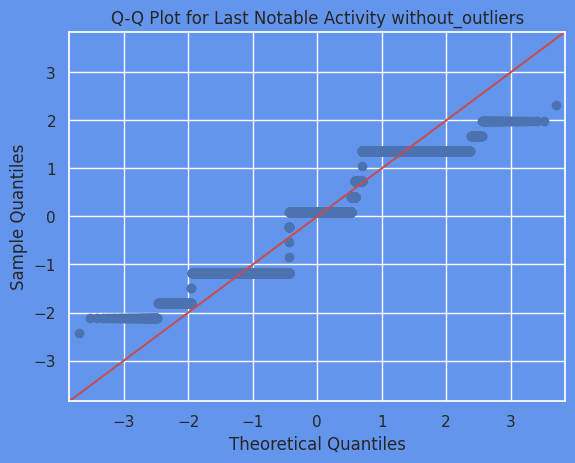

In [595]:
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg
import matplotlib.pyplot as plt

columns_for_qq_plot = numeric_and_binary_data.columns

# Loop through each column and create Q-Q plot
for column in columns_for_qq_plot:
    smg.qqplot(numeric_data_without_outliers[column], line='45', fit=True)
    plt.title(f'Q-Q Plot for {column} without_outliers')
    plt.show()

#7 Is the predictor variables independent of all the other predictor variables?

From the pair plot we can confirm there is negligible colinearity between predictor variables


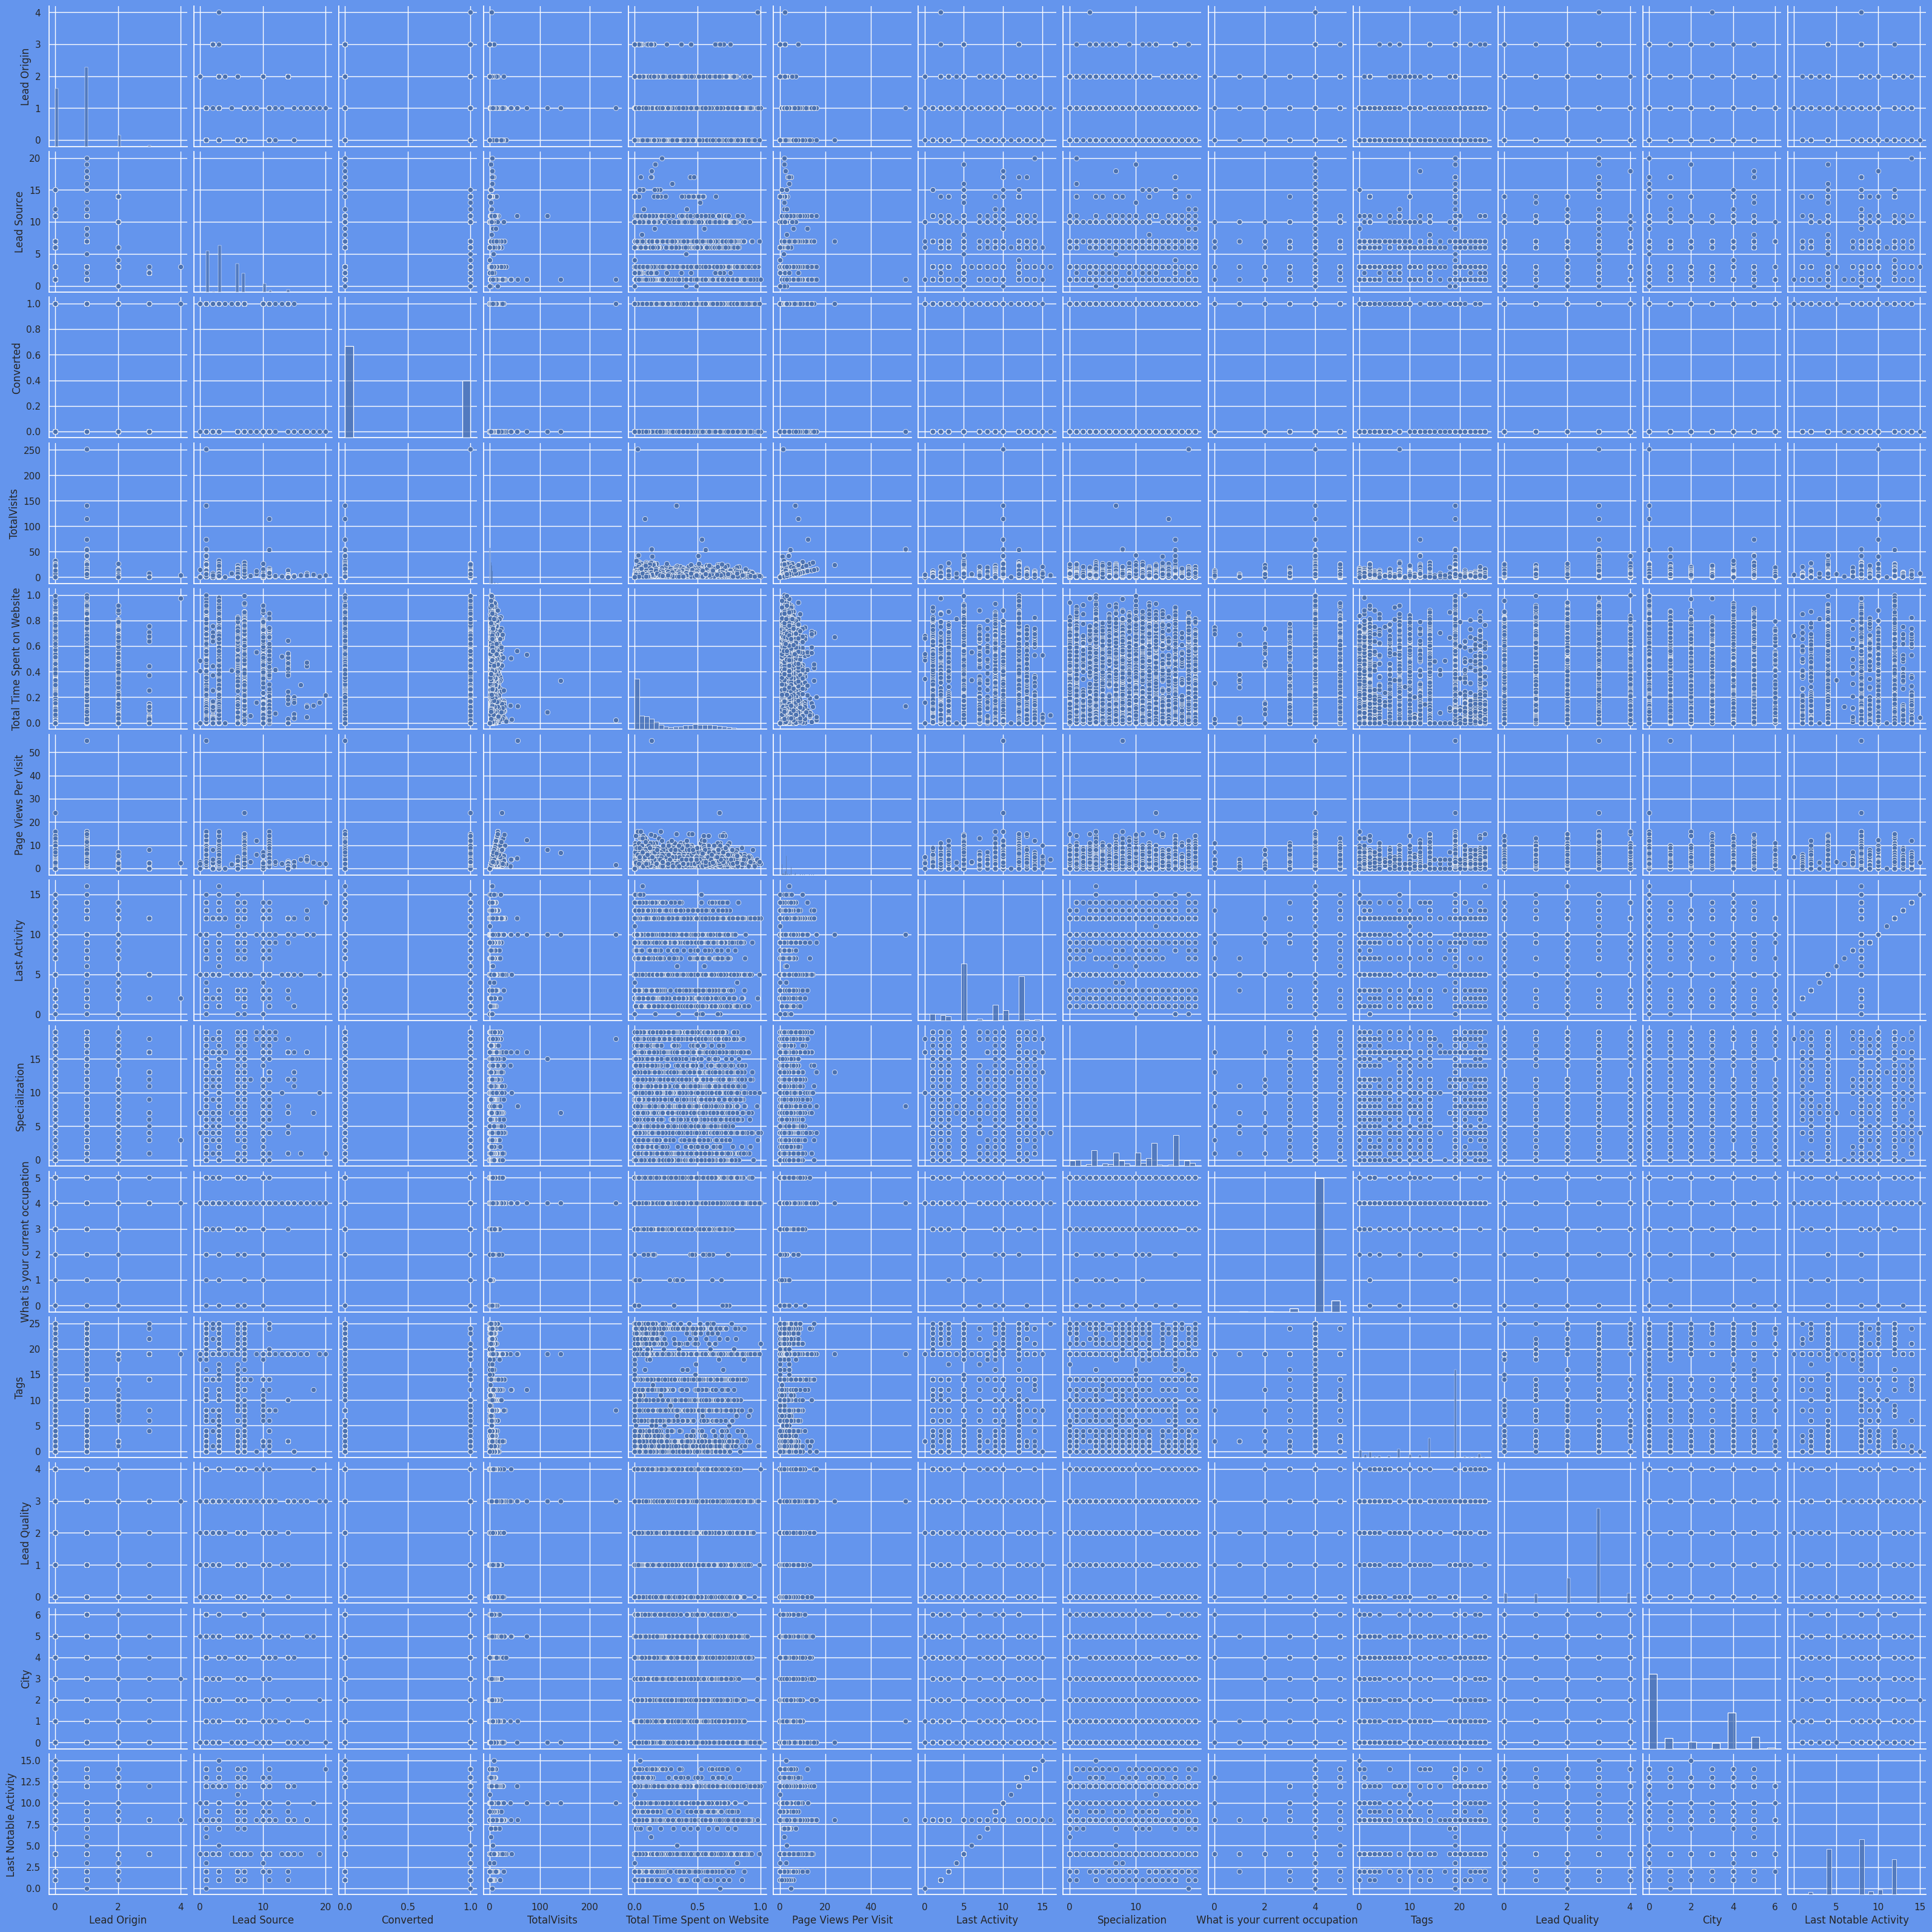

In [596]:
sns.pairplot(numeric_data_without_outliers)


In [597]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Create a copy to preserve the original data
numeric_data_without_outliers = numeric_data.copy()

# Remove outliers from each numeric column
for column in numeric_data.columns:
    numeric_data_without_outliers = remove_outliers(numeric_data_without_outliers, column)

# Create a correlation matrix for numeric and binary columns without outliers
correlation_matrix_without_outliers = numeric_data_without_outliers.corr()

correlation_with_target_without_outliers = correlation_matrix_without_outliers['Converted'].sort_values(ascending=False)

print("\nCorrelation Analysis:")
print(correlation_with_target)


Correlation Analysis:
Converted                          1.000000
Total Time Spent on Website        0.362483
Last Activity                      0.224844
Lead Origin                        0.223725
What is your current occupation    0.214057
Last Notable Activity              0.210445
Lead Source                        0.171005
City                               0.141264
Tags                               0.118375
TotalVisits                        0.030091
Page Views Per Visit              -0.003294
Specialization                    -0.078472
Lead Quality                      -0.551740
Name: Converted, dtype: float64


In [598]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'numeric_and_binary_data' is your DataFrame
X = numeric_and_binary_data.drop('Converted', axis=1)
y = numeric_and_binary_data['Converted']

# Create a copy of the data to preserve the original
numeric_data_without_outliers = numeric_data.copy()

# Remove outliers from each numeric column
for column in X.columns:
    numeric_data_without_outliers = remove_outliers(numeric_data_without_outliers, column)

# Ensure X_encoded and y have the same number of samples
min_samples = min(X_encoded.shape[0], y.shape[0])
X_encoded = X_encoded[:min_samples]
y = y[:min_samples]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Print feature importance
print("\nRandom Forest Feature Importance:")
print(feature_importance_rf)



Random Forest Feature Importance:
Lead Quality                       0.243129
Tags                               0.195060
Total Time Spent on Website        0.174040
Last Notable Activity              0.074000
Last Activity                      0.049834
Specialization                     0.045112
Lead Origin                        0.042407
Lead Source                        0.039288
Page Views Per Visit               0.038826
TotalVisits                        0.037144
What is your current occupation    0.033546
City                               0.027614
dtype: float64


In [599]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Assuming 'rf_model', 'X_test', and 'y_test' are already defined

# Get permutation importance
permutation_result = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)

# Extract and display permutation importance
feature_importance_permutation = pd.Series(permutation_result.importances_mean, index=X_test.columns).sort_values(ascending=False)

print("\nPermutation Importance:")
print(feature_importance_permutation)



Permutation Importance:
Lead Quality                       0.126371
Tags                               0.126317
Total Time Spent on Website        0.035823
Last Notable Activity              0.022655
Specialization                     0.010372
Last Activity                      0.009470
Lead Origin                        0.006836
City                               0.005628
Lead Source                        0.005519
Page Views Per Visit               0.005393
TotalVisits                        0.004473
What is your current occupation    0.002507
dtype: float64


In [600]:
import statsmodels.api as sm

model = sm.OLS(
    numeric_data_without_outliers["Converted"],
    numeric_data_without_outliers[
        [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
        ]
    ],
).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     127.5
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          7.35e-237
Time:                        03:14:24   Log-Likelihood:                -1790.2
No. Observations:                4816   AIC:                             3602.
Df Residuals:                    4805   BIC:                             3674.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Lead Origin                        -0.0134      0.013     -1.029      0.304      -0.039       0.012
Lead Source                         0.0062      0.002      2.533      0.011       0.001       0.011
TotalVisits                         0.0097      0.003      2.924      0.003       0.003       0.016
Total Time Spent on Website         0.6576      0.025     25.828      0.000       0.608       0.708
Page Views Per Visit               -0.0382      0.005     -7.563      0.000      -0.048      -0.028
Last Activity                       0.0144      0.002      7.059      0.000       0.010       0.018
Specialization                      0.0010      0.001      0.758      0.448      -0.002       0.003
What is your current occupation    -0.0459      0.006     -8.109      0.000      -0.057      -0.035
Tags                                0.0083      0.001      5.796      0.000       0.005       0.011
Lead Quality                       -0.0344      0.004     -8.109      0.000      -0.043      -0.026
City                                0.0324      0.003     11.609      0.000       0.027       0.038
Last Notable Activity               0.0123      0.002      5.097      0.000       0.008       0.017
==============================================================================
Omnibus:                      724.522   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1087.622
Skew:                           1.120   Prob(JB):                    6.70e-237
Kurtosis:                       3.631   Cond. No.                     2.24e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.82e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [601]:
from sklearn.model_selection import train_test_split

X = numeric_data_without_outliers[
        [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
        ]
    ]
y = numeric_data_without_outliers["Converted"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t_without_outliers, X_test_without_outliers, y_t_without_outliers, y_test_without_outliers = train_test_split(X, y, test_size=0.1, random_state=1)

X_train_without_outliers, X_val_without_outliers, y_train_without_outliers, y_val_without_outliers = train_test_split(
    X_t_without_outliers, y_t_without_outliers, test_size=0.15, random_state=1
)

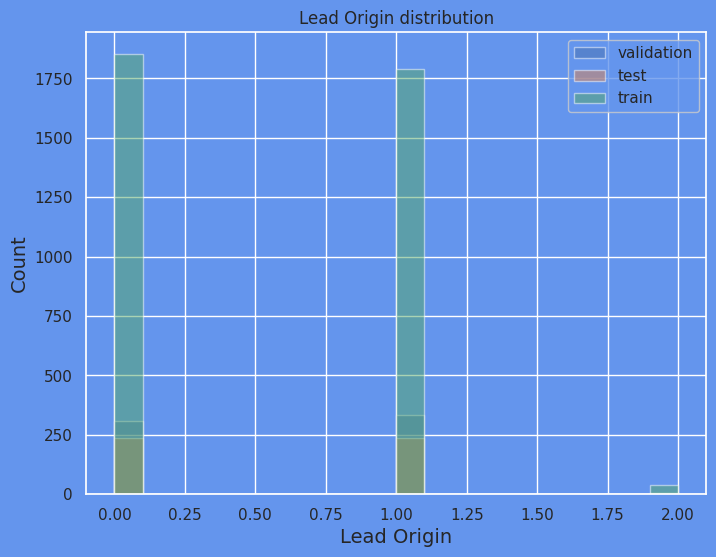

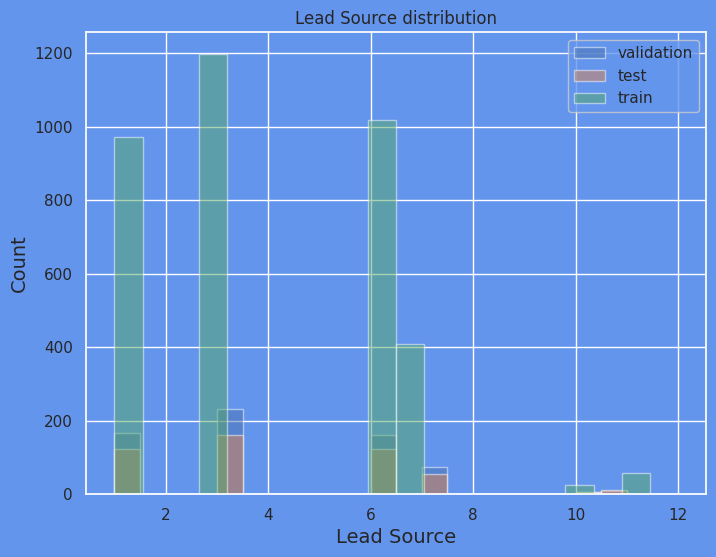

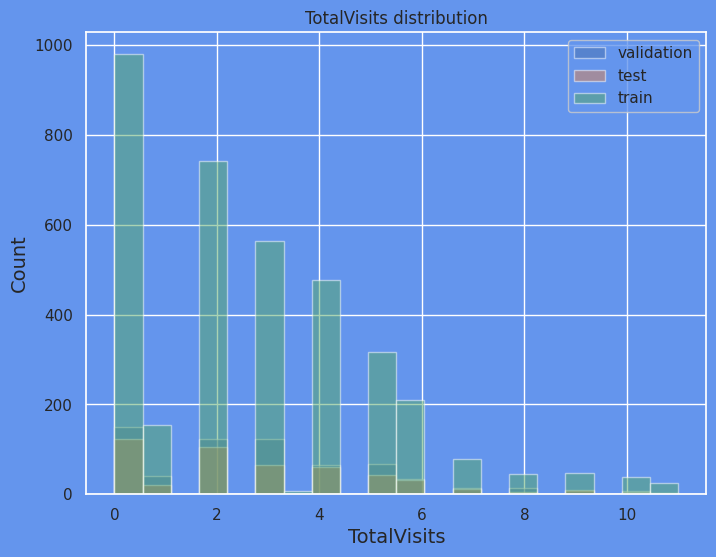

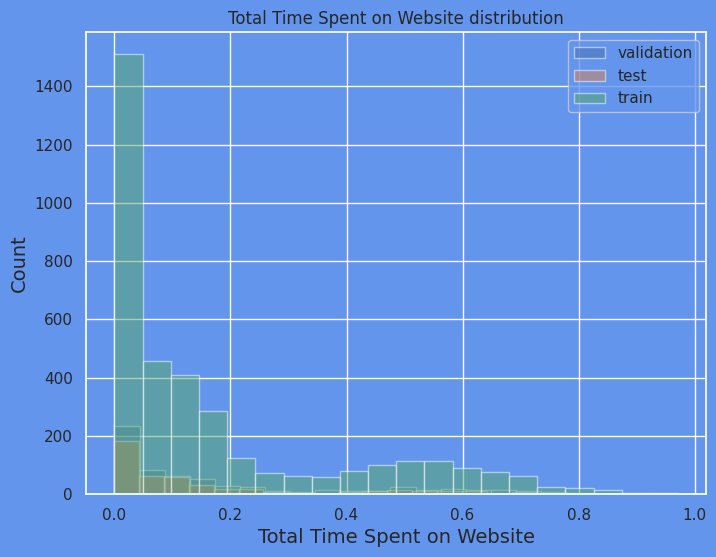

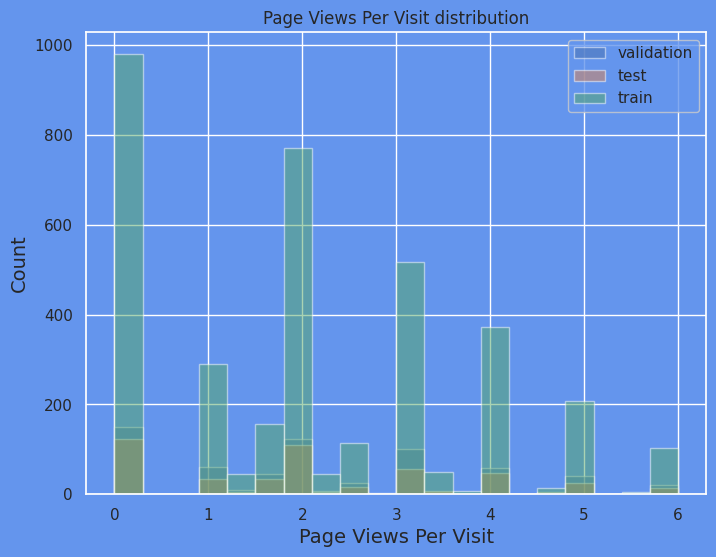

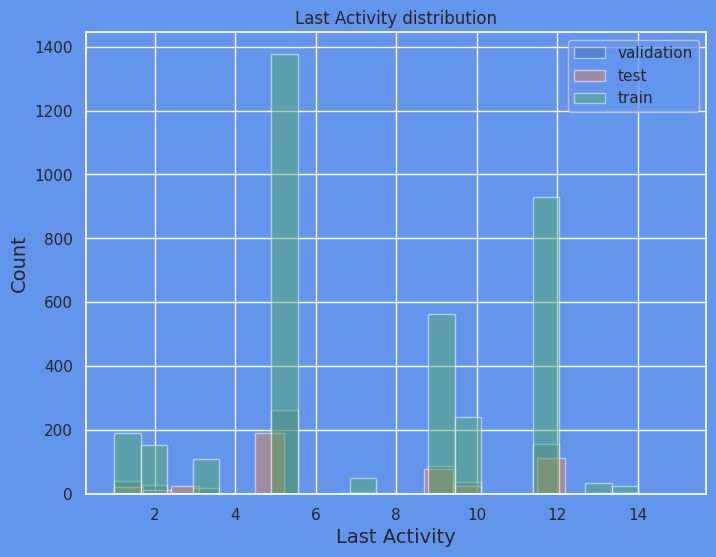

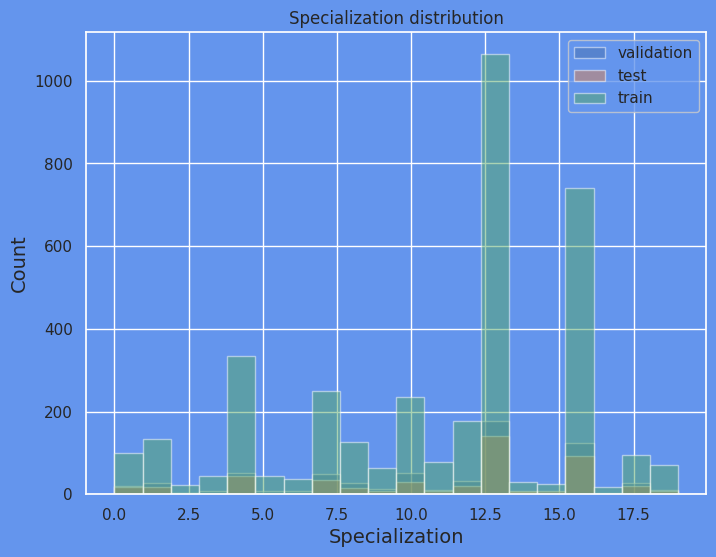

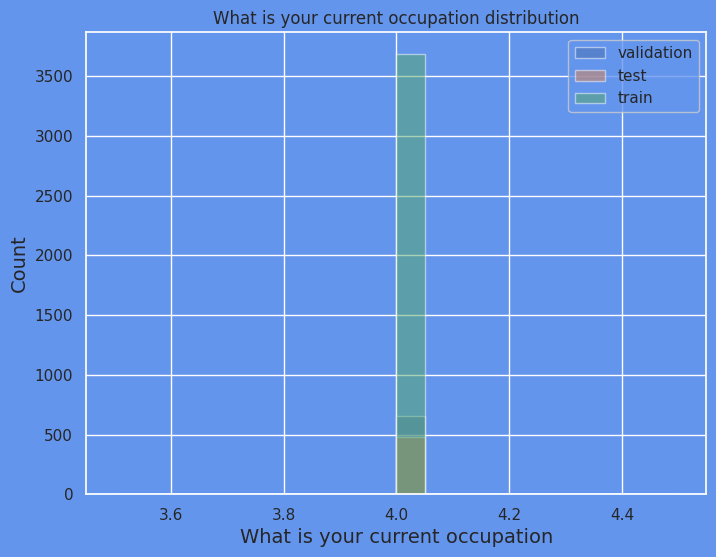

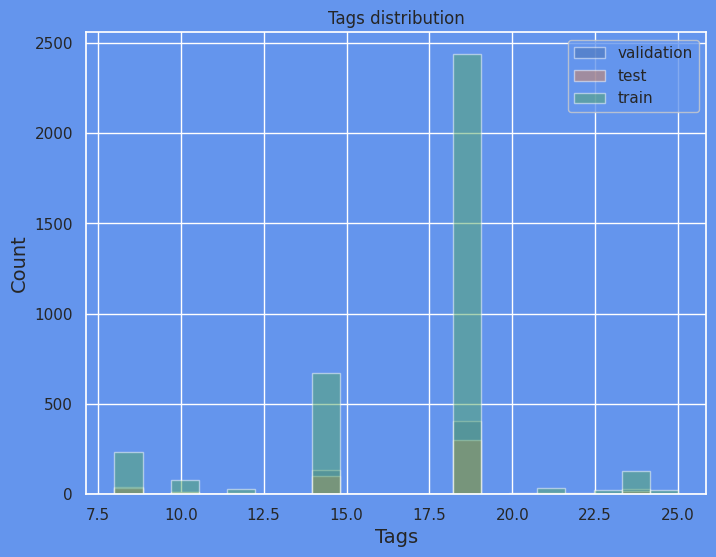

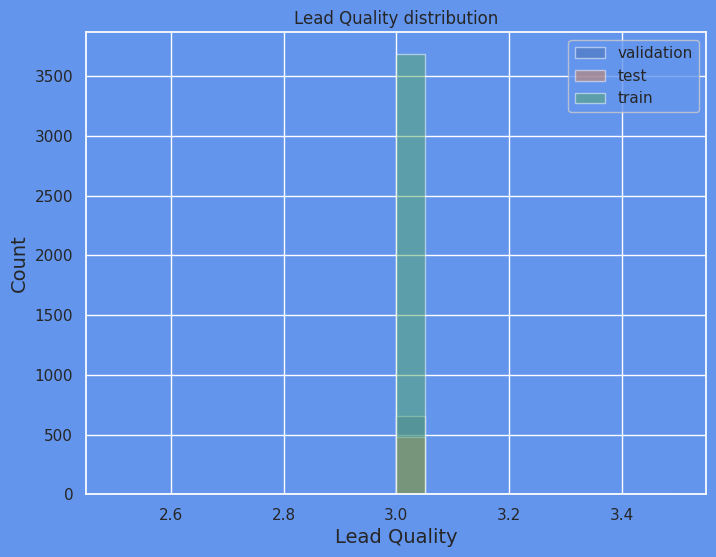

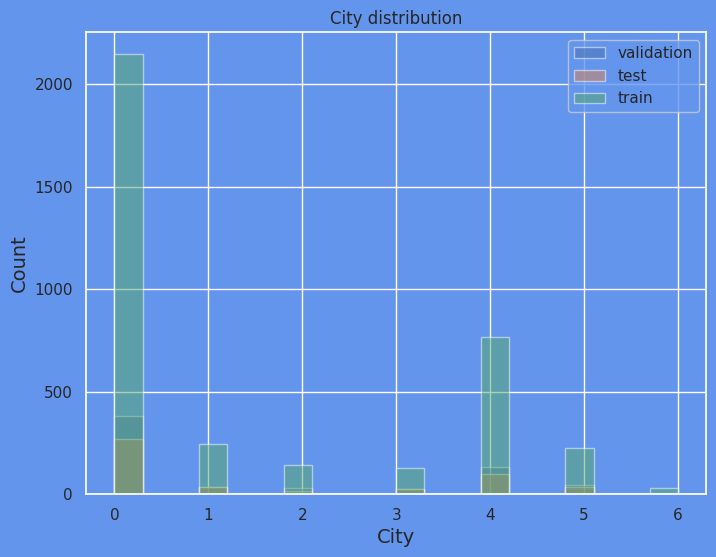

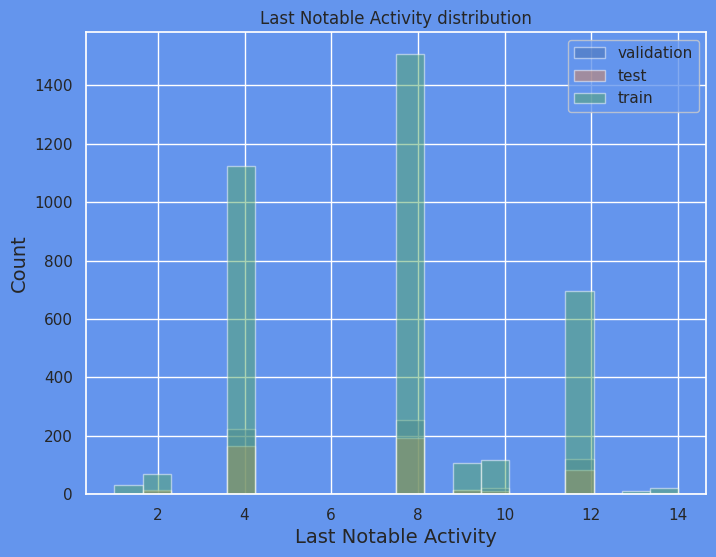

In [602]:
# Looking the data for test, training and validation set
X_test_plot_without_outliers = X_test_without_outliers[
    [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
    ]
]

X_val_plot_without_outliers = X_val_without_outliers[
    [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
    ]
]

X_train_plot_without_outliers = X_train_without_outliers[
    [
            "Lead Origin",
            "Lead Source",
            "TotalVisits",
            "Total Time Spent on Website",
            "Page Views Per Visit",
            "Last Activity",
            "Specialization",
            "What is your current occupation",
            "Tags",
            "Lead Quality",
            "City",
            "Last Notable Activity",
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot_without_outliers.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot_without_outliers[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot_without_outliers[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot_without_outliers[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()


In [603]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

Coefficients: [-3.25238607e-02  6.04809505e-03  7.73179968e-03  6.90010337e-01
 -3.39993387e-02  1.66302469e-02 -2.32277983e-04 -7.21644966e-16
  8.28121824e-03  0.00000000e+00  3.43652510e-02  1.08464829e-02]
Intercept: -0.2718523849593985


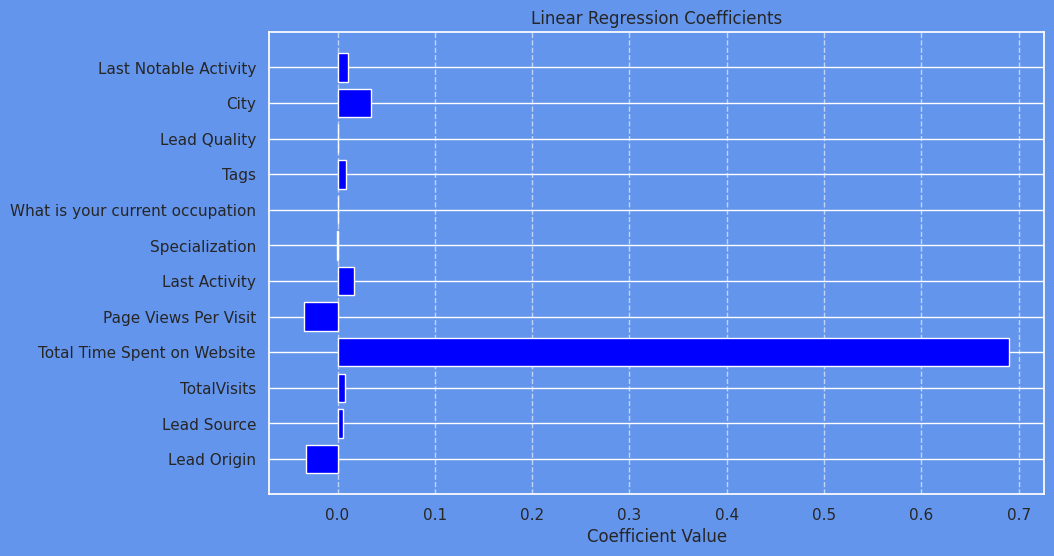

In [604]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_without_outliers, y_train_without_outliers)

# Print the coefficients and intercept
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)


coefficients = regr.coef_
feature_names = X_train_without_outliers.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [605]:
# Make predictions using the training set
y_pred_without_outliers = regr.predict(X_train_without_outliers)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train_without_outliers, y_pred_without_outliers))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train_without_outliers, y_pred_without_outliers))

r2 = r2_score(y_train_without_outliers, y_pred_without_outliers)
print("R^2 score on training set =", r2)


Mean squared error: 0.13
Coefficient of determination: 0.22
R^2 score on training set = 0.21949073003842756


In [606]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the training set
y_pred_without_outliers = regr.predict(X_train_without_outliers)

# The mean squared error
mse = mean_squared_error(y_train_without_outliers, y_pred_without_outliers)
print("Mean squared error on training set: %.2f" % mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_train_without_outliers, y_pred_without_outliers)
print("Coefficient of determination (R^2) on training set: %.2f" % r2)


Mean squared error on training set: 0.13
Coefficient of determination (R^2) on training set: 0.22


In [607]:
# Make predictions using the testing set
y_pred_without_outliers = regr.predict(X_test_without_outliers)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_without_outliers, y_pred_without_outliers))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_without_outliers, y_pred_without_outliers))
r2 = r2_score(y_test_without_outliers, y_pred_without_outliers)
print("R^2 score on test set =", r2)

Mean squared error: 0.11
Coefficient of determination: 0.16
R^2 score on test set = 0.1562847738880726


In [608]:
# Make predictions using the validation set
y_pred_without_outliers = regr.predict(X_val_without_outliers)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val_without_outliers, y_pred_without_outliers))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val_without_outliers, y_pred_without_outliers))
r2_val = r2_score(y_val_without_outliers, y_pred_without_outliers)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.12
Coefficient of determination: 0.16
R^2 score on validation set = 0.15654318017974989


In [609]:
from sklearn.inspection import permutation_importance

# Assuming 'regr' is your regression model, and 'X_test', 'y_test' are your test data
result = permutation_importance(regr, X_test_without_outliers, y_test_without_outliers, random_state=1)

# Display the weights along with feature names
weights = result.importances_mean
std_devs = result.importances_std
feature_names = X_test.columns.tolist()

for weight, std_dev, feature_name in zip(weights, std_devs, feature_names):
    print(f"{weight:.4f} ± {std_dev:.4f}\t{feature_name}")


-0.0062 ± 0.0026	Lead Origin
0.0013 ± 0.0012	Lead Source
0.0007 ± 0.0031	TotalVisits
0.2977 ± 0.0337	Total Time Spent on Website
0.0494 ± 0.0098	Page Views Per Visit
0.0166 ± 0.0107	Last Activity
0.0000 ± 0.0003	Specialization
0.0000 ± 0.0000	What is your current occupation
0.0088 ± 0.0062	Tags
0.0000 ± 0.0000	Lead Quality
0.0588 ± 0.0164	City
0.0024 ± 0.0072	Last Notable Activity


# Q12 Data Imputation

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [610]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
df_imputation = data[['Page Views Per Visit']].copy()

# Set seed for reproducibility
np.random.seed(42)

# Randomly remove 1%, 5%, and 10% of values
missing_percentages = [0.01, 0.05, 0.1]

for missing_percentage in missing_percentages:
    # Create a column with the same name and missing values
    column_name = f"{int(missing_percentage * 100)}_percent"
    df_imputation[column_name] = data['Page Views Per Visit'].copy()

    # Randomly set missing_percentage of values to NaN
    mask = np.random.rand(len(df_imputation)) < missing_percentage
    df_imputation.loc[mask, column_name] = np.nan

    df_imputation.head()



In [611]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [612]:
print(get_percent_missing(df_imputation))


                               column_name  percent_missing
Page Views Per Visit  Page Views Per Visit         0.000000
1_percent                        1_percent         0.930736
5_percent                        5_percent         5.086580
10_percent                      10_percent        10.032468


In [613]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(df_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(df_imputation['10_percent'].isna())[0])


In [614]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")


Length of number_1_idx is 86 and it contains 0.9307359307359307% of total data in column | Total rows: 9240
Length of number_5_idx is 470 and it contains 5.086580086580087% of total data in column | Total rows: 9240
Length of number_10_idx is 927 and it contains 10.032467532467534% of total data in column | Total rows: 9240




```
`# This is formatted as code`
```

# KNN Imputation

The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [615]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [616]:
imputed_number_df.head()


1_percent  5_percent  10_percent
0        0.0        0.0         0.0
1        2.5        2.5         2.5
2        2.0        2.0         2.0
3        1.0        1.0         1.0
4        1.0        1.0         1.0

In [617]:
print(get_percent_missing(imputed_number_df))


           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [618]:
PageViews = data["Page Views Per Visit"]
imputed_mean = pd.concat([PageViews,imputed_number_df])
imputed_mean.columns = ["PageViews","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

PageViews     4.602452
1_Percent     4.602405
5_Percent     4.600074
10_Percent    4.325913
dtype: float64

In [619]:
#  'PageViews' is the true values
true_values = data["Page Views Per Visit"]

# 'imputed_number_df' is the DataFrame containing imputed values
imputed_values_1_percent = imputed_number_df["1_percent"]
imputed_values_5_percent = imputed_number_df["5_percent"]
imputed_values_10_percent = imputed_number_df["10_percent"]

# Calculate bias and variance for 1%
bias_1_percent = np.mean(imputed_values_1_percent - true_values)
variance_1_percent = np.var(imputed_values_1_percent)

# Calculate bias and variance for 5%
bias_5_percent = np.mean(imputed_values_5_percent - true_values)
variance_5_percent = np.var(imputed_values_5_percent)

# Calculate bias and variance for 10%
bias_10_percent = np.mean(imputed_values_10_percent - true_values)
variance_10_percent = np.var(imputed_values_10_percent)

# Print results
print("Bias and Variance for 1%:")
print("Bias:", bias_1_percent)
print("Variance:", variance_1_percent)

print("\nBias and Variance for 5%:")
print("Bias:", bias_5_percent)
print("Variance:", variance_5_percent)

print("\nBias and Variance for 10%:")
print("Bias:", bias_10_percent)
print("Variance:", variance_10_percent)


Bias and Variance for 1%:
Bias: -6.531313738455657e-05
Variance: 4.601907171475366

Bias and Variance for 5%:
Bias: -0.00016441119556035835
Variance: 4.599576105834007

Bias and Variance for 10%:
Bias: -0.0041698079827274075
Variance: 4.325445013660666


The KNN based method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset.

A bias close to zero indicates that, on average, the imputed values are accurate compared to the true values.





# Mean based Imputation with Simpleimputern






In [620]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]


In [621]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [622]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [623]:
PageViews = data["Page Views Per Visit"]
combined_mean = pd.concat([PageViews,imputed_mean])
combined_mean.mean()

0             2.362820
1_percent     2.364507
5_percent     2.358021
10_percent    2.356974
dtype: float64

In [624]:
# Calculate Bias
bias = imputed_mean['1_percent'].mean() - PageViews.mean()
print("\nBias and Variance for 1%:")
print("Bias  for 1_percent:", bias)

# Calculate Variance
variance = ((imputed_mean['1_percent'] - imputed_mean['1_percent'].mean())**2).mean()
print("Variance for 1_percent:", variance)

# Calculate Bias and Variance for 5%
bias_5_percent = imputed_mean['5_percent'].mean() - PageViews.mean()
variance_5_percent = ((imputed_mean['5_percent'] - imputed_mean['5_percent'].mean())**2).mean()

# Calculate Bias and Variance for 10%
bias_10_percent = imputed_mean['10_percent'].mean() - PageViews.mean()
variance_10_percent = ((imputed_mean['10_percent'] - imputed_mean['10_percent'].mean())**2).mean()

# Print results
print("\nBias and Variance for 5%:")
print("Bias:", bias_5_percent)
print("Variance:", variance_5_percent)

print("\nBias and Variance for 10%:")
print("Bias:", bias_10_percent)
print("Variance:", variance_10_percent)



Bias and Variance for 1%:
Bias  for 1_percent: 0.0016866610994878961
Variance for 1_percent: 4.574157712983709

Bias and Variance for 5%:
Bias: -0.00479934591212583
Variance: 4.341817890972437

Bias and Variance for 10%:
Bias: -0.005845709868451454
Variance: 3.8445952457485237


The Mean based method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset.



```
`# This is formatted as code`
```

#Imputation Using Multivariate Imputation by Chained Equation (MICE)





This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.

In [625]:
df_imputation_mice = df_imputation[['1_percent','5_percent','10_percent']]
print(get_percent_missing(df_imputation_mice))

           column_name  percent_missing
1_percent    1_percent         0.930736
5_percent    5_percent         5.086580
10_percent  10_percent        10.032468


In [626]:
!pip install impyute


In [627]:
from impyute.imputation.cs import mice
# start the MICE training
imputed_training=mice(df_imputation_mice.values)

In [628]:
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [629]:
# imputed_mice = pd.DataFrame(imputed_training.fit_transform(df_imputation_mice), columns = df_imputation_mice.columns)
print(get_percent_missing(imputed_training))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [630]:
pageviews = data["Page Views Per Visit"]

In [638]:
combined_mice = pd.concat([pageviews,imputed_training])
combined_mice.columns = ["pageviews","1_Percent","5_Percent","10_Percent"]
combined_mice.mean()

pageviews     2.362820
1_Percent     2.362896
5_Percent     2.361600
10_Percent    2.362470
dtype: float64

The MICE method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset.



In [632]:
import pandas as pd
from impyute.imputation.cs import mice
import numpy as np

# Assuming 'df_imputation' is your DataFrame with missing values
df_imputation_mice = df_imputation[['1_percent', '5_percent', '10_percent']]

# Identify columns with missing values
columns_with_missing = df_imputation_mice.columns[df_imputation_mice.isnull().any()].tolist()

# Perform MICE imputation
imputed_training = mice(df_imputation_mice.values)

# Create a DataFrame from the imputed values
imputed_training = pd.DataFrame(imputed_training, columns=df_imputation_mice.columns)

# Assuming 'price' is your target variable
price = data["Page Views Per Visit"]

# Combine the target variable with the imputed values
combined_mice = pd.concat([price, imputed_training], axis=1)
combined_mice.columns = ["Price", "1_Percent", "5_Percent", "10_Percent"]

# Calculate Bias and Variance for 1%
bias_mice_1_percent = imputed_training['1_percent'].mean() - price.mean()
variance_mice_1_percent = ((imputed_training['1_percent'] - imputed_training['1_percent'].mean())**2).mean()

# Calculate Bias and Variance for 5%
bias_mice_5_percent = imputed_training['5_percent'].mean() - price.mean()
variance_mice_5_percent = ((imputed_training['5_percent'] - imputed_training['5_percent'].mean())**2).mean()

# Calculate Bias and Variance for 10%
bias_mice_10_percent = imputed_training['10_percent'].mean() - price.mean()
variance_mice_10_percent = ((imputed_training['10_percent'] - imputed_training['10_percent'].mean())**2).mean()

# Print results
print("\nBias and Variance for 1% (MICE):")
print("Bias for 1_percent:", bias_mice_1_percent)
print("Variance for 1_percent:", variance_mice_1_percent)

print("\nBias and Variance for 5% (MICE):")
print("Bias:", bias_mice_5_percent)
print("Variance:", variance_mice_5_percent)

print("\nBias and Variance for 10% (MICE):")
print("Bias:", bias_mice_10_percent)
print("Variance:", variance_mice_10_percent)



Bias and Variance for 1% (MICE):
Bias for 1_percent: 7.649188504510462e-05
Variance for 1_percent: 4.599112572569278

Bias and Variance for 5% (MICE):
Bias: -0.0012198866881396597
Variance: 4.580923562479771

Bias and Variance for 10% (MICE):
Bias: -0.0003494755078365941
Variance: 4.59201950705506


 the obtained bias and variance values seem reasonable, and there doesn't appear to be any significant bias in the imputed values

In [633]:
categorical_fields

Prospect ID  Lead Origin  Lead Source  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620            0            6   
1     2a272436-5132-4136-86fa-dcc88c88f482            0            7   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a            1            1   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc            1            1   
4     3256f628-e534-4826-9d63-4a8b88782852            1            3   
...                                    ...          ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9            1            1   
9236  82a7005b-7196-4d56-95ce-a79f937a158d            1            1   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c            1            1   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9            1            3   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff            1            1   

     Do Not Email Do Not Call  Converted  TotalVisits  \
0              No          No          0          0.0   
1              No          No          0          5.0   
2              No          No          1          2.0   
3              No          No          0          1.0   
4              No          No          1          2.0   
...           ...         ...        ...          ...   
9235          Yes          No          1          8.0   
9236           No          No          0          2.0   
9237          Yes          No          0          2.0   
9238           No          No          1          3.0   
9239           No          No          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  Last Activity  \
0                        0.000000                  0.00             10   
1                        0.296655                  2.50              5   
2                        0.674296                  2.00              5   
3                        0.134243                  1.00             13   
4                        0.628521                  1.00              1   
...                           ...                   ...            ...   
9235                     0.812060                  2.67              4   
9236                     0.104754                  2.00             12   
9237                     0.087588                  2.00             12   
9238                     0.219630                  3.00             12   
9239                     0.562940                  3.00             12   

      Specialization  What is your current occupation  Tags  Lead Quality  \
0                 16                                4     8             1   
1                 16                                4    14             3   
2                  1                                3    19             2   
3                 11                                4    14             3   
4                 16                                4    19             2   
...              ...                              ...   ...           ...   
9235               8                                4    19             0   
9236              11                                4    25             2   
9237               1                                4    21             3   
9238               7                                4    19             3   
9239              18                                4    19             2   

      City  Last Notable Activity  
0        4                      8  
1        4                      4  
2        0                      4  
3        0                      8  
4        0                      8  
...    ...                    ...  
9235     0                      3  
9236     0                     12  
9237     0                     12  
9238     3                     12  
9239     1                      8  

[9240 rows x 16 columns]

In [634]:
categorical_fields = data.copy()

#13 For categorical data, calculate the accuracy and a confusion matrix.

In [635]:
categorical_fields = categorical_fields.drop(['Prospect ID', 'Do Not Email', 'Do Not Call'], axis=1)
categorical_fields.head


<bound method NDFrame.head of       Lead Origin  Lead Source  Converted  TotalVisits  \
0               0            6          0          0.0   
1               0            7          0          5.0   
2               1            1          1          2.0   
3               1            1          0          1.0   
4               1            3          1          2.0   
...           ...          ...        ...          ...   
9235            1            1          1          8.0   
9236            1            1          0          2.0   
9237            1            1          0          2.0   
9238            1            3          1          3.0   
9239            1            1          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  Last Activity  \
0                        0.000000                  0.00             10   
1                        0.296655                  2.50              5   
2                        0.674296                  

Accuracy: 91.72%
Confusion Matrix:
[[1048   59]
 [  94  647]]


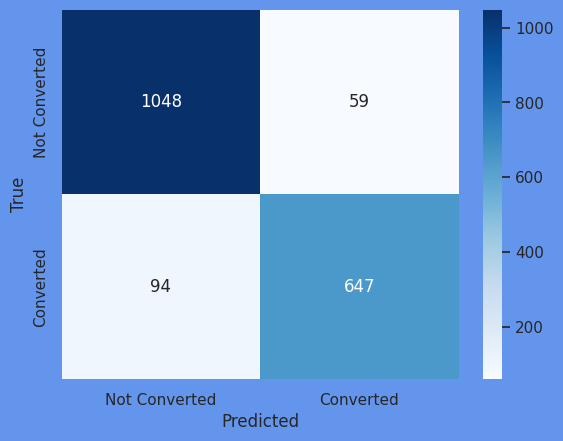

In [636]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'categorical_fields' is your DataFrame with label-encoded categorical columns
target_column = 'Converted'

# Split the data into features and target
X_categorical = categorical_fields.drop(target_column, axis=1)
y_categorical = categorical_fields[target_column]

# Split the data into training and testing sets
X_train_categorical, X_test_categorical, y_train_categorical, y_test_categorical = train_test_split(
    X_categorical, y_categorical, test_size=0.2, random_state=42
)

classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train_categorical, y_train_categorical)

# Make predictions on the test set
y_pred_categorical = classifier.predict(X_test_categorical)

# Calculate accuracy
accuracy = accuracy_score(y_test_categorical, y_pred_categorical)

# Calculate confusion matrix with proper labels
conf_matrix = confusion_matrix(y_test_categorical, y_pred_categorical, labels=[0, 1])

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel("Predicted")
plt.ylabel("True")

# Print accuracy and confusion matrix values
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Show the plot
plt.show()


# The Accuracy of the Model predicting whether the lead will be converted or not is around

**Accuracy: 91.72%**


## Answer the following questions:
<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
  <h3 style="color: #336699;">Q1 What are the data types? (Only numeric and categorical) </h3>

    
    <b>Numeric Data Types:</b>


1) Lead Number (int64)

2) Converted (int64)

3) TotalVisits (float64)

4) Total Time Spent on Website (int64)

5) Page Views Per Visit (float64)

6) Asymmetrique Activity Score (float64)

7) Asymmetrique Profile Score (float64)

   
    <b>Categorical Data Types:</b>


1)Prospect ID (object)

2)Lead Origin (object)

3)Lead Source (object)

4)Do Not Email (object)

5)Do Not Call (object)

6)Last Activity (object)

7)Country (object)

8)Specialization (object)

9)How did you hear about X Education (object)

10) What is your current occupation (object)

11)What matters most to you in choosing a course (object)

12)Search (object)

13)Magazine (object)

14)Newspaper Article (object)

15)X Education Forums (object)

16)Newspaper (object)

17)Digital Advertisement (object)

18)Through Recommendations (object)

19)Receive More Updates About Our Courses (object)

20)Tags (object)

21)Lead Quality (object)

22)Update me on Supply Chain Content (object)

23)Get updates on DM Content (object)

24)Lead Profile (object)

25)City (object)

26)Asymmetrique Activity Index (object)

27)Asymmetrique Profile Index (object)

28)I agree to pay the amount through cheque (object)

29)A free copy of Mastering The Interview (object)

30)Last Notable Activity (object)

</div>


<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">2. * Are there missing values? </h3>
    
    1)Dropped columns with more than 70% N/A values
    2)Dropped columns which could introduce a bias in our model dropped values which had values skewed towards one value
    
</div>

<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">3 * What are the likely distributions of the numeric variables?

        For Numeric values the finally selected fields are "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"
        have done a QQ-plot, Box-plot, Correlation matrix to showcase their distributions
        
</h3>
</div>

<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">4 * Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
        
Used RandomForestClassifier, permutation_importance and Correlation Analysis to showcase and predict the most important
independent variables to predict a target (dependent variable)    
     
        
Permutation Importance:
Lead Quality                       0.126371
Tags                               0.126317
Total Time Spent on Website        0.035823
    
Random Forest Feature Importance:
Lead Quality                       0.243129
Tags                               0.195060
Total Time Spent on Website        0.174040
           
Correlation Analysis:
Total Time Spent on Website        0.362483
Last Activity                      0.224844
Lead Origin                        0.223725

        
</h3>
   5 * Which independent variables have missing data? How much?
  
  The independent variable do not have missing data
    
</div>

<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">6. * Do the training and test sets have the same data?</h3>
  
    No the training and test sets have different data below is the breakdown
    
    # Spliting data
    
    Training 76.5%, Validation set 13.5% and Test set 10%

    
</div>

<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">7. * Is the predictor variables independent of all the other predictor variables?</h3>
  
Variables with Low Correlation:

For example, 'TotalVisits' and 'What is your current occupation' have correlation coefficients close to zero (0.002107), suggesting a weak linear relationship.

Variables with Moderate Correlation:

Some variables have moderate correlation coefficients, such as 'Page Views Per Visit' and 'Last Activity' (0.061631). While this indicates a positive relationship, it's not extremely strong.

Variables with High Correlation:

'Last Activity' and 'Last Notable Activity' have a relatively high correlation coefficient of 0.745354. This suggests a stronger linear relationship between these two variables.
</div>

<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">8. * Which predictor variables are the most important?</h3>

Feature Ranking (RFE):

Total Time Spent on Website         1
Lead Quality                        2
Tags                                3
    
    
</div>

<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">9 * Do the ranges of the predictor variables make sense?
</h3>
The range of predictor variable differ vastly from each other and hence I have normalized it in the operation ahead for TotalVisits,Total Time Spent on Website,Page Views Per Visit for better boxplot quality. They make sense after normality
    
    Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000  9240.000000                  9240.000000   
mean      0.463714     0.385390     3.445238                   487.698268   
std       0.288237     0.486714     4.818723                   548.021466   
min       0.000000     0.000000     0.000000                     0.000000   
25%       0.208752     0.000000     1.000000                    12.000000   
50%       0.442663     0.000000     3.000000                   248.000000   
75%       0.712456     1.000000     5.000000                   936.000000   
max       1.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.362820  
std                2.145333  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000  
    
    
</div>

<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">
    10.	What are the distributions of the predictor variables?   
    </h3>


 Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000  9240.000000                  9240.000000   
mean      0.463714     0.385390     3.445238                   487.698268   
std       0.288237     0.486714     4.818723                   548.021466   
min       0.000000     0.000000     0.000000                     0.000000   
25%       0.208752     0.000000     1.000000                    12.000000   
50%       0.442663     0.000000     3.000000                   248.000000   
75%       0.712456     1.000000     5.000000                   936.000000   
max       1.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.362820  
std                2.145333  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000  


</div>

<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">
    
    11.	Remove outliers and keep outliers (does if have an effect of the final predictive model)?
    
    The outliers do not seem to affect the final predictive model. They are insignificant

    </h3>

</div>


<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">12. Remove 1%, 5%, and 10% of Data Randomly:</h3>


0s
KNN Imputation

PageViews     4.602452
1_Percent     4.602405
5_Percent     4.600074
10_Percent    4.325913


output
Bias and Variance for 1%:
Bias: -6.531313738455657e-05
Variance: 4.601907171475366

Bias and Variance for 5%:
Bias: -0.00016441119556035835
Variance: 4.599576105834007

Bias and Variance for 10%:
Bias: -0.0041698079827274075
Variance: 4.325445013660666




Mean based Imputation with Simpleimputern

0s
output
pageviews     2.362820
1_percent     2.364507
5_percent     2.358021
10_percent    2.356974


Bias and Variance for 1%:
Bias  for 1_percent: 0.0016866610994878961
Variance for 1_percent: 4.574157712983709

Bias and Variance for 5%:
Bias: -0.00479934591212583
Variance: 4.341817890972437

Bias and Variance for 10%:
Bias: -0.005845709868451454
Variance: 3.8445952457485237



Imputation Using Multivariate Imputation by Chained Equation (MICE)

pageviews      2.362820
1_Percent      2.362751
5_Percent      2.362747
10_Percent     2.362743


Bias and Variance for 1% (MICE):
Bias for 1_percent: 7.649188504510462e-05
Variance for 1_percent: 4.599112572569278

Bias and Variance for 5% (MICE):
Bias: -0.0012198866881396597
Variance: 4.580923562479771

Bias and Variance for 10% (MICE):
Bias: -0.0003494755078365941
Variance: 4.59201950705506




</div>

<div style="background-color: #f2f2f2; padding: 10px; border: 1px solid #ccc;">
    <h3 style="color: #336699;">13. For categorical data, calculate the accuracy and a confusion matrix.:</h3>

Accuracy and confusion matrix for categorical data only to predict if the lead will be converted or not is

Accuracy: 91.72%
Confusion Matrix:
[[1052   55]
 [  91  650]]
</div>


For categorical data, calculate the accuracy and a confusion matrix.

# **References:**


https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection

https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5


https://www.w3schools.com/python/numpy/


https://www.w3schools.com/python/pandas/





# **Licences:**

impyute 3.7 by Elton Law https://impyute.readthedocs.io/en/master/user_guide/getting_started.html#versions
Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html
Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html
sklearn.simpleimputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
sklearn.LinearRegression, GridSearch https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



MIT License

Copyright (c) 2024 sakhareni

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.